## **EDA: nomadismo digital y coste de vida global**

**Miembros Team 4 EDA:** Daniela Aguirre, Alejandro Balaguer y Juan F. Cía

----

## **1. Introducción: contexto de negocio**

### **Qué buscamos con el análisis**

El nomadismo digital ha crecido de forma acelerada, pero no todos los destinos son igual de atractivos para este perfil. 

Elegir un destino depende de la evaluación de varios factores entre lo que tenemos:

- **Coste de vida**: vivienda, alimentación y transporte.
- **Infraestructura digital**: velocidad y coste de internet.
- **Calidad de vida**: seguridad, bienestar y servicios.
- **Capacidad económica local**: relación entre el promedio de salarios y el coste mensual de productos y servicios.
- **Accesibilidad burocrática a trabajar en esos destinos**: facilidad de visa y requisitos legales.

**Impacto en negocio**

Lógicamente este tipo de análisis puede tener interés no solo para los propios nómadas digitales, también para gobiernos, instituciones o empresas que están relacionados con el tejido productivo y que este análisis ayude a tomar decisiones. 

1. **Gobiernos e instituciones**: ser un destino ideal para el nomadismo digital puede atraer profesionales cualificados e inversiones.
2. **Empresas de tecnología o remote-first**: oportunidad competitiva para obtener talento de profesionales en paííes nómadas digitales.
3. **Empresas relacionadas con el mundo inmobiliario**: los nómadas buscan viviendas en páises de destino. 
4. **Empresas de tramitaciones burocráticas**: empresas que asesores y tramiten documentación legal a nómadas en países de destino. 
5. **Plataformas de relocación**: empresas que faciliten la recolación de nómadas digitales entre países y empresas. 
6. **Empresas de servicios específicos para nomadismo**.

### **1.2 Objetivo del EDA**

> ¿Qué características económicas y de coste de vida diferencian a los países y ciudades mejor posicionados para el nomadismo digital frente a los menos atractivos?

### **1.3 Hipótesis a validar en el análisis**

El análisis se estructura en torno a hipótesis primarias y secundarias:

#### Hipótesis primarias

- **Hipótesis 1**: coste de vida medio --> ¿los mejores destinos siempre son los que menos coste mensual exigen?
- **Hipótesis 2**: salarios vs coste --> ¿la relación entre los salarios y el coste es clave para ser un buen destino?
- **Hipótesis 3**: conectividad para trabajar --> ¿cuanto más velocidad de conexión a menos precio, mejor destino nómada digital?

#### Hipótesis secundarias

- **Hipótesis 4**: la variable vivienda --> ¿el alquiler de vivienda es una razón determinante por encima de alimentación y transporte?
- **Hipótesis 5**: más por menos dinero --> ¿hay países que ofrecen mejores condiciones generales por menos coste mensual?
- **Hipótesis 6**: bienestar social --> ¿los países con buen índice de felicidad atraen más nómadas digitales?
- **Hipótesis 7**: outliers estratégicos --> ¿países fuera de rango por coste y puntuación que son buenos destinos para los nómadas?
- **Hipótesis 8**: seguridad --> la seguridad es un elemento decisivo en la elección, incluso con costes elevados
- **Hipótesis 9**: facilidad de visado --> la accesibilidad legal a los países es una variable que afecta al ránking de destinos

## **1. Cargamos las librerías y los datasets limpios procedentes del ETL**

In [ ]:
# Cargamos las librerías que vamos a necesitar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

# Configuración de las visualizaciones del análisis univariante:
# 1. Estilos de Matplotlib y Seaborn
# 2. Paleta estándar viridis

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Cargamos todos los datasets totalmente limpios del proceso de ETL

df_cost = pd.read_csv("./data/variables-agregadas-cost-of-living.csv")
df_circleloop = pd.read_csv("./data/digital-nomad-index-cicleloop-clean.csv")
df_movingto = pd.read_csv("./data/digital-nomad-index-movingto-clean.csv")

# Cargamos los datasets para saber si todo está correcto

df_cost.head(10) # Selección de variables originales y agregadas de Cost of Living

,city_name,country_name,meal_inexpensive_restaurant,meal_midrange_restaurant_2p,mcmeal_fastfood,beer_domestic_restaurant_0_5l,beer_imported_restaurant_0_33l,cappuccino_restaurant,soda_restaurant_0_33l,water_restaurant_0_33l,...,avg_net_salary,mortgage_interest_rate_20y,data_quality_flag,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,2689.62,3.47,1,Asia,650.030,4.631667,11.61,1209.990,2.222845,24.168098
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1419.87,5.03,1,Asia,830.905,1.995000,9.67,1147.345,1.237527,58.519794
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,1211.68,5.19,1,Asia,425.365,1.572500,7.67,692.370,1.750047,35.105391
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,640.81,7.96,1,Asia,408.225,1.078333,6.16,590.785,1.084675,63.704530
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,586.46,8.06,1,Asia,182.575,1.047500,6.68,391.890,1.496491,31.131705
5,Dhaka,Bangladesh,1.95,11.71,4.88,5.85,5.12,1.95,0.29,0.16,...,280.73,9.26,1,Asia,114.940,1.193333,3.90,286.730,0.979074,40.943255
6,Osaka,Japan,7.45,48.39,5.36,3.35,3.72,3.28,1.09,0.81,...,2322.46,1.49,1,Asia,525.550,3.302500,10.73,1035.305,2.243262,22.629023
7,Jakarta,Indonesia,2.59,22.69,3.57,2.06,3.24,2.23,0.61,0.27,...,509.12,9.05,1,Asia,391.510,1.765000,4.82,643.550,0.791112,76.899356
8,Shenzhen,China,4.27,28.47,4.98,1.14,3.99,4.20,0.47,0.34,...,1572.22,4.99,1,Asia,586.910,1.829167,8.47,890.265,1.766013,37.330017
9,Kinshasa,Congo,15.11,42.63,10.08,1.74,2.50,4.35,2.78,0.84,...,400.00,19.33,0,Africa,1362.500,4.215000,19.46,2664.840,0.150103,340.625000


In [ ]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   city_name                            4742 non-null   object 
 1   country_name                         4742 non-null   object 
 2   meal_inexpensive_restaurant          4742 non-null   float64
 3   meal_midrange_restaurant_2p          4742 non-null   float64
 4   mcmeal_fastfood                      4742 non-null   float64
 5   beer_domestic_restaurant_0_5l        4742 non-null   float64
 6   beer_imported_restaurant_0_33l       4742 non-null   float64
 7   cappuccino_restaurant                4742 non-null   float64
 8   soda_restaurant_0_33l                4742 non-null   float64
 9   water_restaurant_0_33l               4742 non-null   float64
 10  milk_1l                              4742 non-null   float64
 11  bread_white_500g              

In [ ]:
df_circleloop.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49
5,6,France,177.93,50.45,34.91,886.86,6.66,12.8,5360,60.80
6,7,Netherlands,125.82,88.13,53.27,1419.21,7.45,13.4,3440,60.27
7,8,Australia,58.52,88.35,60.71,1343.16,7.22,30.0,17600,60.16
8,9,Switzerland,186.40,73.85,90.52,1807.65,7.56,29.9,3840,60.15
9,10,Germany,120.13,49.67,36.09,964.08,7.08,15.7,12720,60.00


In [ ]:
df_movingto.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year
5,6,Mexico,87,82,90,75,94,86,1.92-35%,183 days/year
6,7,Czech Republic,86,87,78,88,85,90,15%,183 days/year
7,8,Malaysia,85,80,92,85,90,85,0-30%,182 days/year
8,9,Croatia,84,84,76,88,88,89,24%,1 year
9,10,Costa Rica,83,79,85,80,90,88,0-25%,183 days/year


## **2. Descripción de los datasets antes de comenzar el análisis**

### **2.1. Dataset de variables agregadas de Cost of Living**

1. **Número de filas**: 4.742 ciudades
2. **Número de variables**: 65 en total (58 originales + 7 variables agregadas)
3. **Fuente**: Numbeo / Kaggle
4. **Categorías de variables:**
- Restaurantes y bebidas (x1-x8)
- Supermercado (x9-x27)
- Transporte (x28-x33)
- Vivienda y suministros (x36-x38, x48-x53)
- Economía (x54-x55: salario, hipoteca)
5. **Variables agregadas**:
- **Variables agregada 1 — `nomad_housing_cost`**: promedio del alquiler de un dormitorio (centro + afueras) / 2
- **Variables agregada 2 — `basic_basket_index`**: promedio de productos básicos de supermercado
- **Variables agregada 3 — `daily_meal_cost`**: cappuccino + comida de restaurante económico
- **Variables agregada 4 — `monthly_nomad_cost`**: coste mensual total (vivienda + comida + internet + utilities + transporte)
- **Variables agregada 5 — `local_purchasing_power`**: salario / coste mensual nómada
- **Variables agregada 6 — `cappuccino_index`**: normalización del precio del cappuccino
- **Variables agregada 7 — `housing_salary_ratio`**: (alquiler / salario) × 100


### **2.2. Dataset de Nomad Index de Circleloop**

1. **Número de filas**: 85 países
2. **Número de variables**: 10 variables en total
3. **Fuente**: Circleloop
4. **Variables propias de este dataset**:
- `broadband_speed_mbps`y `mobile_speed_mbps`: conectividad a internet general y móvil
- `broadband_cost` y `monthly_rent`: costes en conectividad y alquiler
- `happiness_index`: índice de felicidad y bienestar
- `digital_nomad_score`: variable clave con la puntuación sobre mejores destino para nómadas digitales.

### **2.3. Dataset de Nomad Index de Movingto**

1. **Número de filas**: 40 registros
2. **Número de variables**: 10 variables en total
3. **Fuente**: Movingto
4. **Variables propias de este dataset**:
- `safety`: score de seguridad de 0 a 100.
- `visa_ease`: facilidad de visa para nómadas digitales de 0 a 100. 
- `taxes` y `tax_free_period`: información fiscal sobre impueestos. 



## **3. Análisis univariante de todos los datasets**

### **3.1. Análisis univariante: Cost of Living**

#### **Variables categóricas de Cost of Living**

Analizamos la distribución de ciudades por país y continente: 

1. Cost of Living es el dataset con mayor volumen de datos: 4.743 ciudades en total. 
2. Ver el volumen de ciudades por continente y por países nos sitúan a nivel general.  

Distribución de ciudades por continente:
----------------------------------------
continent
Europe           1730
North America    1338
Asia              961
Africa            311
South America     305
Oceania            97
Name: count, dtype: int64

Total: 4,742 ciudades


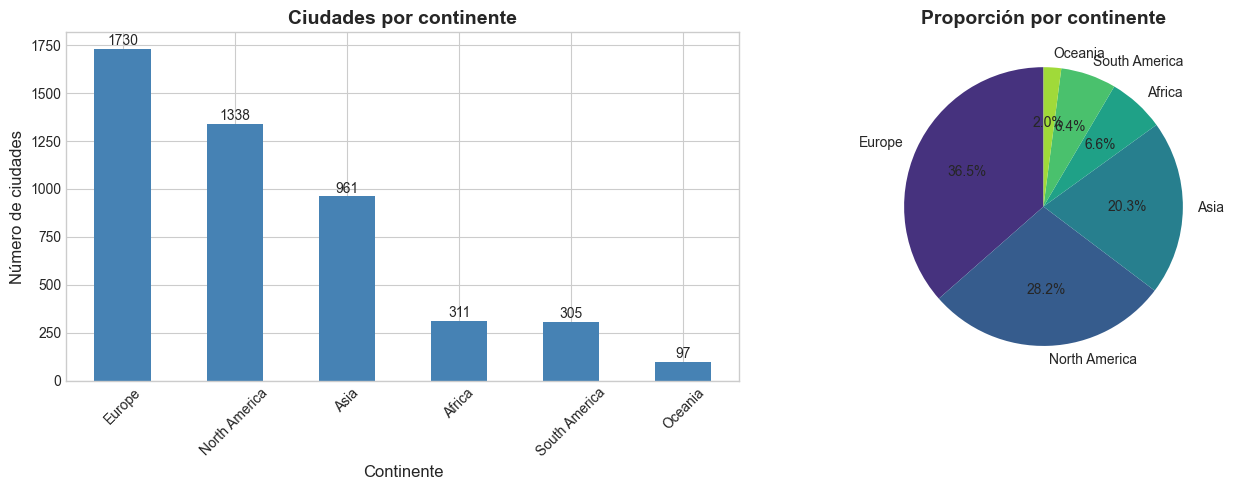

Top 10 de países con más ciudades:
----------------------------------
country_name
United States     1027
Italy              170
India              165
Brazil             157
United Kingdom     155
Germany            144
Russia             129
Canada             117
France              99
China               99
Name: count, dtype: int64


In [ ]:
# Distribución por continente

print("Distribución de ciudades por continente:")
print("----------------------------------------")
continent_counts = df_cost['continent'].value_counts()
print(continent_counts)
print(f"\nTotal: {continent_counts.sum():,} ciudades")

# Montamos la matriz para los dos gráficos. En este caso: 
# 1. Gráfico de barras con número de ciudades por continente
# 2. Gráfico de tarta con el porcentaje de reparto de volumen de ciudades por continente

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Gráfico de barras con ciudades por continente

ax1 = axes[0]
continent_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Ciudades por continente', fontsize=14, fontweight='bold')
ax1.set_xlabel('Continente', fontsize=12)
ax1.set_ylabel('Número de ciudades', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


for i, v in enumerate(continent_counts): # Añadimos valores sobre las barras
    ax1.text(i, v + 20, str(v), ha='center', fontsize=10)

# Gráfico de tarta con el porcentaje de reparto entre continente 

ax2 = axes[1]
continent_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción por continente', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Resumen de volumen de ciudades por países

print("Top 10 de países con más ciudades:")
print("----------------------------------")
country_counts = df_cost['country_name'].value_counts().head(10)
print(country_counts)


#### **Variables numéricas originales, no agregadas, de Cost of Living**

1. Analizamos variables oroginales que son relevante para un nómada digital: vivienda, alimentación, transporte y salarios.
2. Mostramos distribuciones con histogramas y valores atípicos con diagramas de caja.  

In [ ]:
# Creamos una lista de las variables originales principales de Cost of Living

vars_list = ['rent_1br_city_center', 'rent_1br_outside_center',
                'meal_inexpensive_restaurant', 'cappuccino_restaurant',
                'public_transport_monthly_pass', 'gasoline_1l',
                'avg_net_salary', 'utilities_85sqm',
                'internet_60mbps_unlimited']

# Pintamos los valores estadísticos descriptivos de cada una de las variables originales más relevantes: 
# Son relevantes dentro del plan de vida de un nómada digital: 
# 1. Alquiler de vivienda: 'rent_1br_city_center', 'rent_1br_outside_center'
# 2. Cesta de la compra: 'meal_inexpensive_restaurant', 'cappuccino_restaurant'
# 3. Ttransporte: 'public_transport_monthly_pass', 'gasoline_1l'
# 4. Salario y gastos: 'avg_net_salary', 'utilities_85sqm'
# 5. Conectividad a internet: 'internet_60mbps_unlimited'

print("Valores estadísticos descriptivos de las variables originales de Cost of Living:")
print("--------------------------------------------------------------------------------")
df_cost[vars_list].describe().round(2)

Valores estadísticos descriptivos de las variables originales de Cost of Living:
--------------------------------------------------------------------------------


,rent_1br_city_center,rent_1br_outside_center,meal_inexpensive_restaurant,cappuccino_restaurant,public_transport_monthly_pass,gasoline_1l,avg_net_salary,utilities_85sqm,internet_60mbps_unlimited
count,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00
mean,707.64,565.72,10.39,2.74,40.79,1.36,1870.48,135.04,143.33
std,620.69,505.84,7.02,1.35,31.45,0.49,1600.99,86.77,7056.95
min,21.70,12.20,0.45,0.22,0.00,0.03,18.00,6.07,1.36
25%,258.98,177.94,4.48,1.58,17.79,1.10,456.00,67.77,18.97
50%,526.87,410.96,10.00,2.62,36.88,1.26,1369.87,127.90,34.41
75%,1048.31,850.00,15.00,3.75,50.00,1.71,3075.00,182.40,57.85
max,12608.83,8989.37,57.14,10.00,369.86,3.70,12821.40,1066.67,485991.77


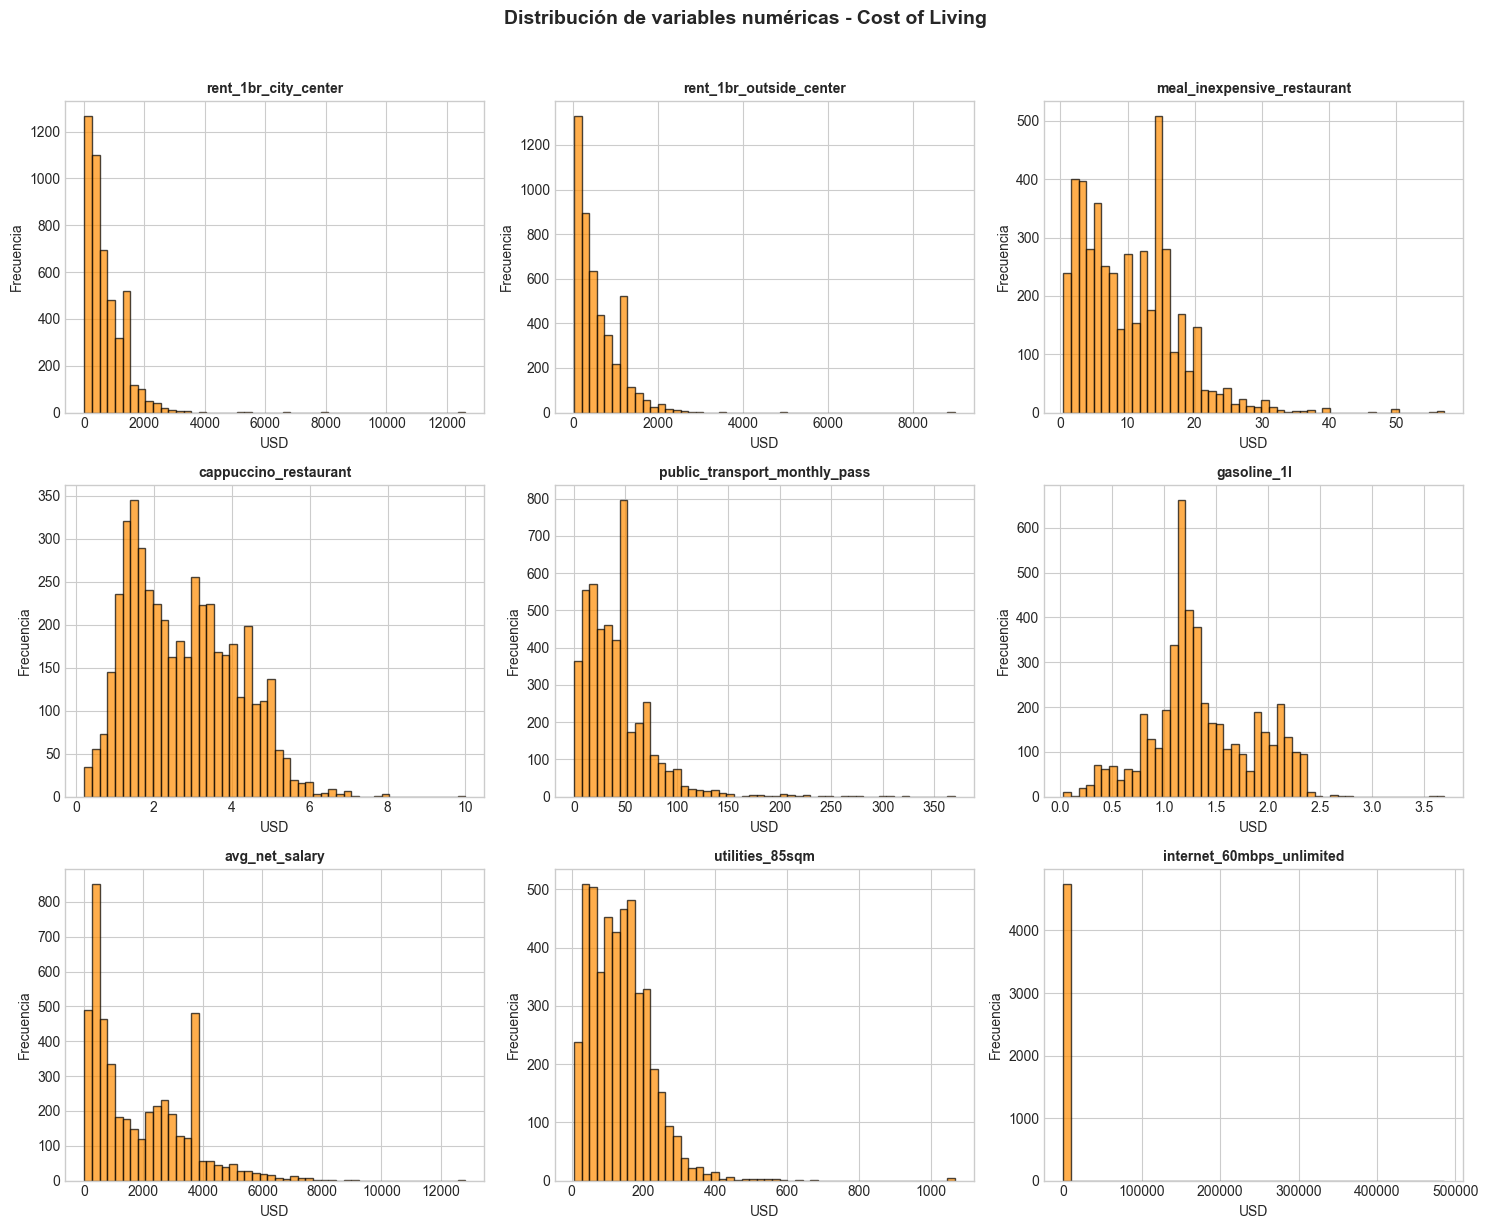

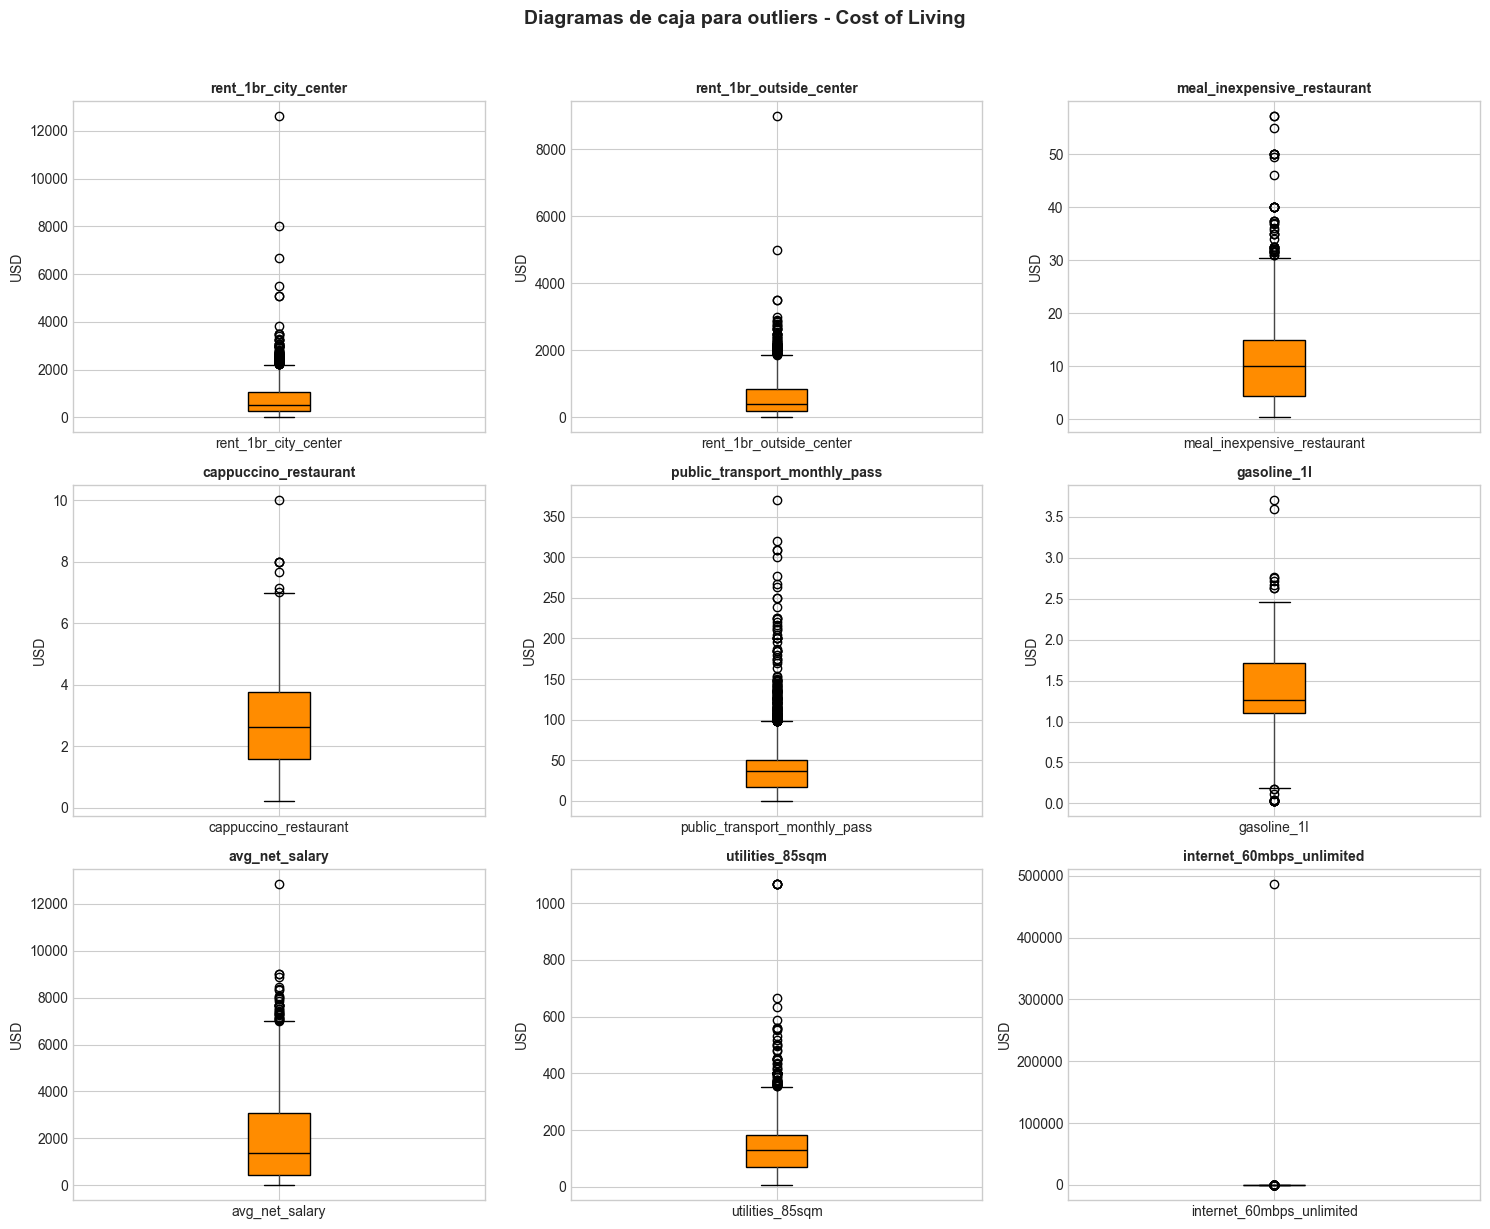

In [ ]:
# Visualizaciones: distribuciones con histogramas y outliers con diagramas de caja

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost[var].hist(bins=50, ax=ax, color='darkorange', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables numéricas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost.boxplot(column=var, ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='darkorange', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_ylabel('USD')

plt.suptitle('Diagramas de caja para outliers - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **Análisis de variables agregadas de Cost of Living**

Hacemos lo mismo, pero esta vez con las variables agregadas de Cost of Living. 

- Analizamos variables agregadas que creamos porque combinaban variables para un análisis más preciso.
- Mostramos distribuciones con histogramas y valores atípicos con diagramas de caja.  
- Análisis porcentual de variables agregadas de Cost of Living: 
    1. Análisis por percentiles del coste medio mensual en todas las ciudades del dataset. 
    2. Capacidad de compra por encima de salario medio. 
    3. Volumen de inversión del salario medio en vivienda. 

In [ ]:
# Lista de variables agregadas de Cost of Living

added_vars_list = [
    'nomad_housing_cost',
    'basic_basket_index',
    'daily_meal_cost',
    'monthly_nomad_cost',
    'local_purchasing_power',
    'housing_salary_ratio'
    ]

# Valores estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables agregadas de Cost of Living:")
print("-------------------------------------------------------------------------------")
df_cost[added_vars_list].describe().round(2)

Valores estadísticos descriptivos de las variables agregadas de Cost of Living:
-------------------------------------------------------------------------------


,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
count,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00
mean,636.68,2.35,13.14,1223.50,1.52,47.39
std,553.18,1.17,7.96,7094.61,0.75,75.85
min,18.98,0.49,1.10,108.08,0.00,2.94
25%,219.81,1.44,6.37,491.88,0.97,26.95
50%,471.72,2.08,12.26,967.96,1.46,34.68
75%,945.63,3.14,18.92,1642.79,1.94,49.12
max,10799.10,10.30,64.28,486948.09,7.94,2191.42


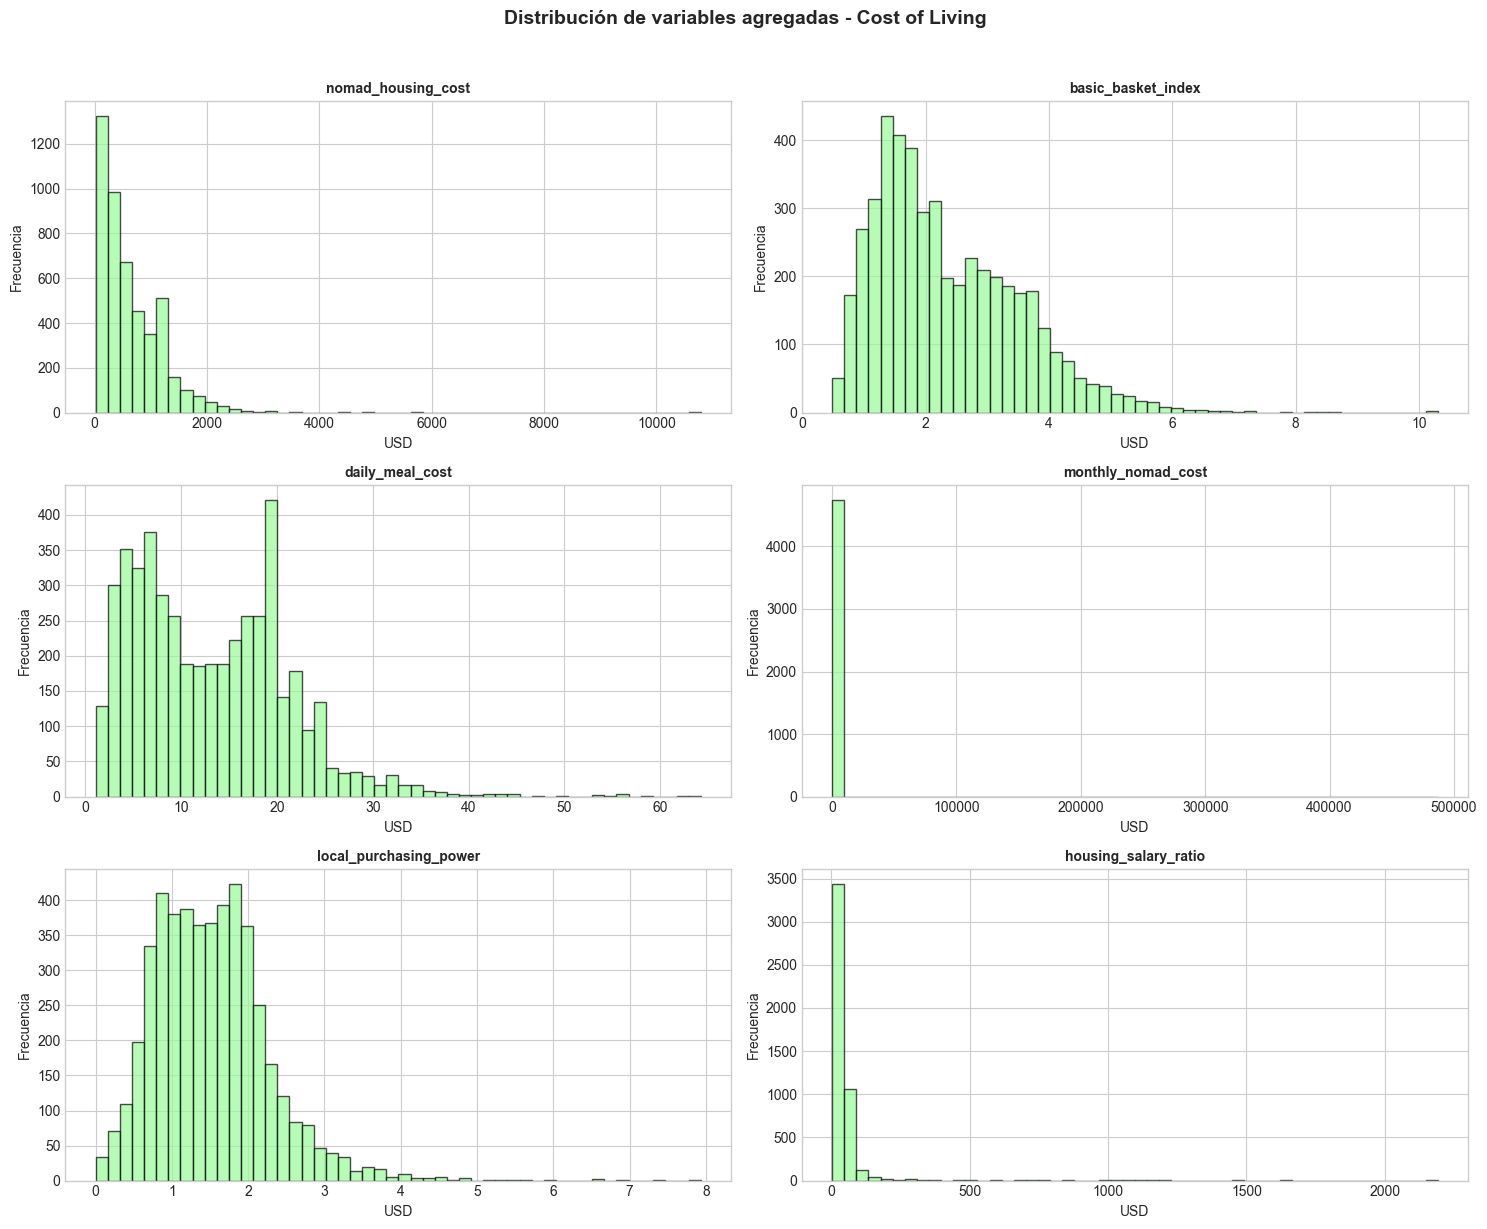

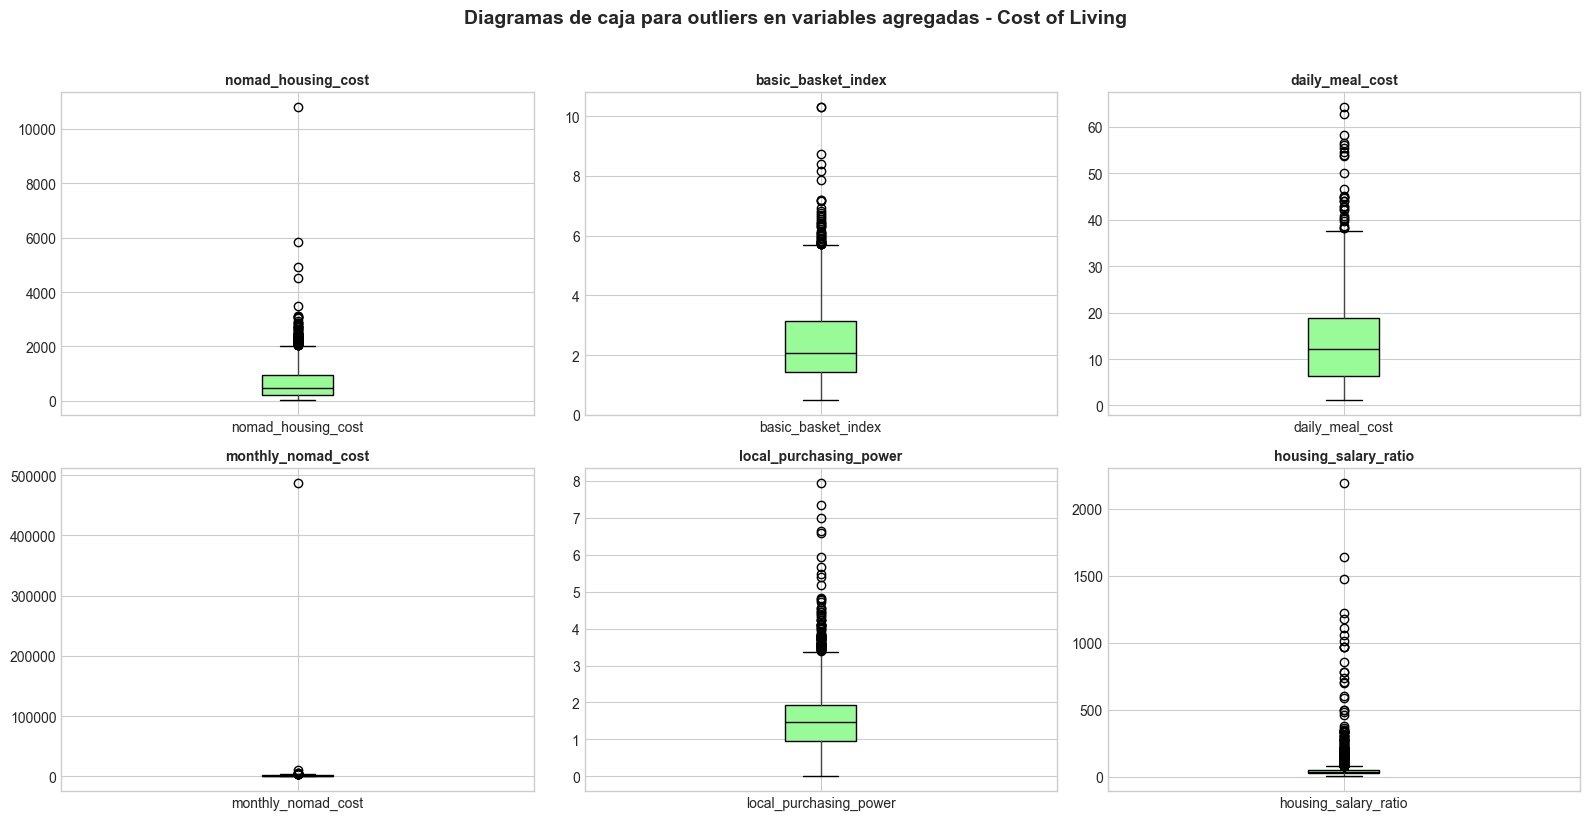

In [ ]:
# Visualizaciones: distribuciones con histogramas y outliers con diagramas de caja

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, idx in enumerate(added_vars_list):
    ax = axes[i]
    df_cost[idx].hist(bins=50, ax=ax, color='palegreen', edgecolor='black', alpha=0.7)
    ax.set_title(idx, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables agregadas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, idx in enumerate(added_vars_list):
    ax = axes[i]
    df_cost.boxplot(column=idx, ax=ax, 
                    patch_artist=True, 
                    boxprops=dict(facecolor='palegreen', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(idx, fontsize=10, fontweight='bold')

plt.suptitle('Diagramas de caja para outliers en variables agregadas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Análisis porcentual de variables agregadas de Cost of Living: 

1. Análisis por percentiles del coste medio mensual en todas las ciudades del dataset.
2. Capacidad de compra por encima de salario medio. 
3. Volumen de inversión del salario medio en vivienda. 

In [ ]:
# Análisis de ciudades baratas, moderadas, caras y muy caras en función de los percentiles del gasto mensual

print("Coste mensual de la vida en todas las ciudades del dataset Cost of Living")
print("El análisis establece los cuartiles (25% y 75%), la mediana y el percentil 90")
print("-----------------------------------------------------------------------------")
mnc = df_cost['monthly_nomad_cost']
print(f"Coste mensual barato (percentil 25): {mnc.quantile(0.25):.0f} dólares")
print(f"Coste mensual moderado (percentil 50): {mnc.quantile(0.50):.0f} dólares")
print(f"Coste mensual caro (percentil 75): {mnc.quantile(0.75):.0f} dólares")
print(f"Coste mensual muy caro (percentil 90): {mnc.quantile(0.90):.0f} dólares")

Coste mensual de la vida en todas las ciudades del dataset Cost of Living
El análisis establece los cuartiles (25% y 75%), la mediana y el percentil 90
-----------------------------------------------------------------------------
Coste mensual barato (percentil 25): 492 dólares
Coste mensual moderado (percentil 50): 968 dólares
Coste mensual caro (percentil 75): 1643 dólares
Coste mensual muy caro (percentil 90): 2113 dólares


In [ ]:
# Capacidad de compra mensual: ¿qué % de ciudades tienen salarios promedio por encima del coste mensual?
# La variable estaba calculada sobre df_cost['local_purchasing_power'] = (df_cost['avg_net_salary'] / df_cost['monthly_nomad_cost'])
# Si la variables > 1, el salario promedio es mayor al coste mensual

print("Análisis de capacidad de compra (salario promedio/coste mensual)")
print("----------------------------------------------------------------")
lpp = df_cost['local_purchasing_power']
print(f"Ciudades donde salario > coste nmensual: {(lpp > 1).sum()} ({(lpp > 1).mean()*100:.1f}%)")
print(f"Ciudades donde salario < coste mensual: {(lpp < 1).sum()} ({(lpp < 1).mean()*100:.1f}%)")
print("-----------------------------------------------------------------------------------------------")
print("Los ciudadanos del 73,7% de las ciudades ingresan un salario promedio superior al gasto mensual")
print("Los ciudadanos del 26,3% de las ciudades ingresan un salario promedio inferior al gasto mensual")


Análisis de capacidad de compra (salario promedio/coste mensual)
----------------------------------------------------------------
Ciudades donde salario > coste nmensual: 3494 (73.7%)
Ciudades donde salario < coste mensual: 1248 (26.3%)
-----------------------------------------------------------------------------------------------
Los ciudadanos del 73,7% de las ciudades ingresan un salario promedio superior al gasto mensual
Los ciudadanos del 26,3% de las ciudades ingresan un salario promedio inferior al gasto mensual


In [ ]:
# ¿Qué cantidad de salario dedican al gasto en vivienda?
# Las recomendaciones es que la inversión del salario en vivienda debería estar en torno al 30%. 
# Entre el 30-50% el gasto del salario en vivienda sería menos razonable. 
# Un gasto por encimas del 50% indicaría una inversión insostenible en el tiempo. 

print("Análisis del gasto porcentual del salario promedio en vivienda")
print("--------------------------------------------------------------")
hsr = df_cost['housing_salary_ratio']
print(f"Situación óptima (gasto < 30%): {(hsr < 30).sum()} ciudades ({(hsr < 30).mean()*100:.1f}%)")
print(f"Situación mejorables (gasto entre 30-50%): {((hsr >= 30) & (hsr < 50)).sum()} ciudades ({((hsr >= 30) & (hsr < 50)).mean()*100:.1f}%)")
print(f"Situación arriesgada (gastos > 50%): {(hsr >= 50).sum()} ciudades ({(hsr >= 50).mean()*100:.1f}%)")


Análisis del gasto porcentual del salario promedio en vivienda
--------------------------------------------------------------
Situación óptima (gasto < 30%): 1591 ciudades (33.6%)
Situación mejorables (gasto entre 30-50%): 2014 ciudades (42.5%)
Situación arriesgada (gastos > 50%): 1137 ciudades (24.0%)


### **3.2 Análisis univariante: Nomad Index Circleloop**


In [ ]:
# Estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables de Nomad Index Cicleloop:")
print("----------------------------------------------------------------------------")
df_circleloop.describe().round(2)

Valores estadísticos descriptivos de las variables de Nomad Index Cicleloop:
----------------------------------------------------------------------------


,rank,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,43.00,81.16,42.68,47.99,712.93,6.06,11.51,4741.65,49.12
std,24.68,56.41,23.16,27.75,470.69,0.89,15.39,12279.24,10.10
min,1.00,4.97,12.68,8.34,145.08,4.15,0.10,40.00,26.32
25%,22.00,31.89,24.63,31.46,382.59,5.51,1.70,430.00,38.97
50%,43.00,68.90,38.88,45.18,558.09,6.12,5.30,1050.00,52.08
75%,64.00,120.13,53.89,59.72,943.02,6.66,15.40,3490.00,56.57
max,85.00,229.42,129.61,183.17,2452.32,7.81,87.90,83900.00,74.35


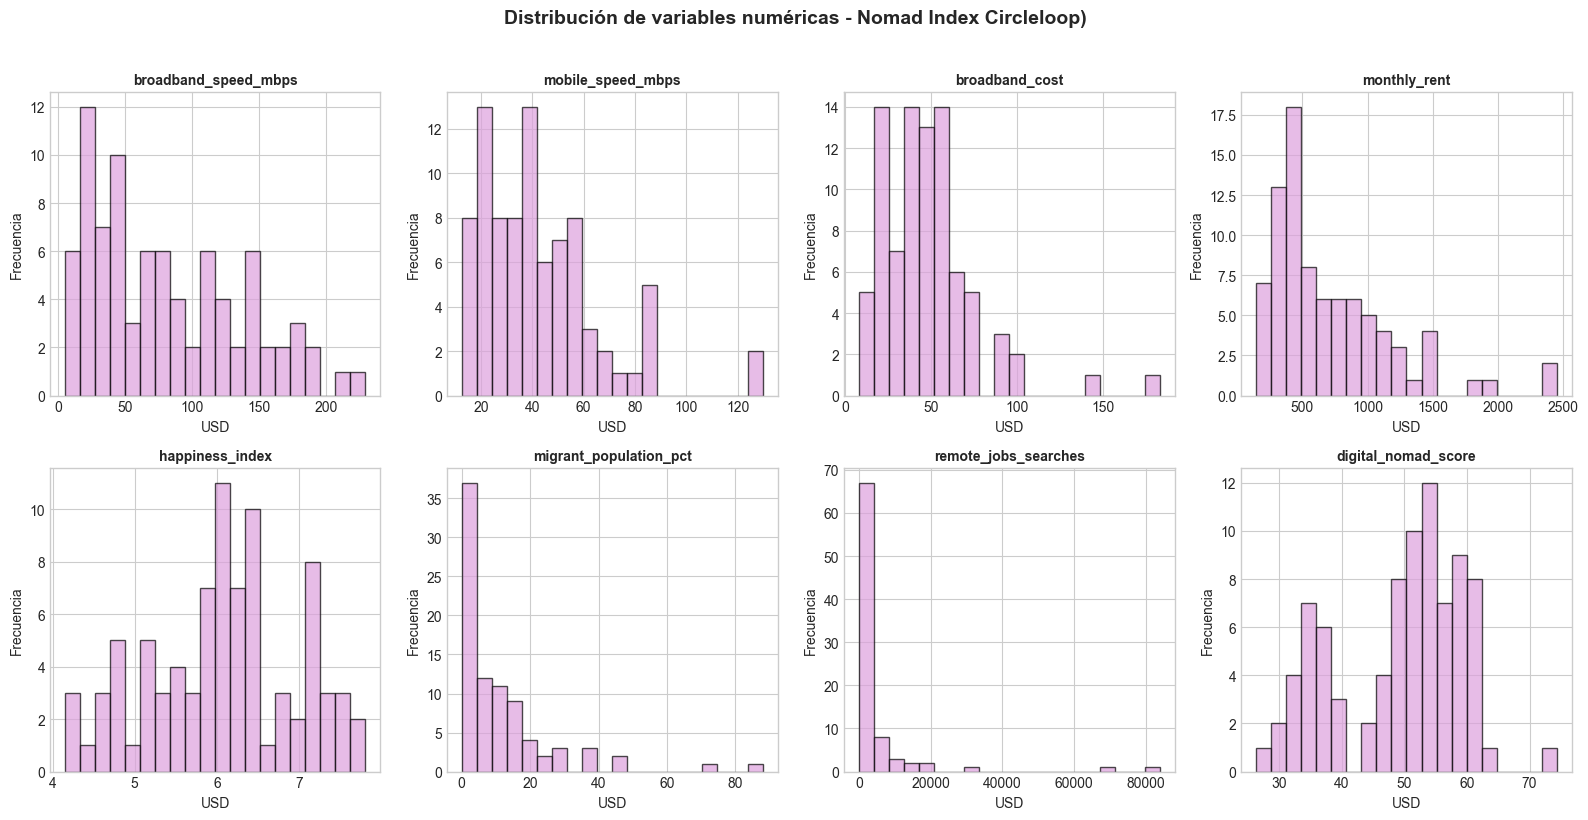

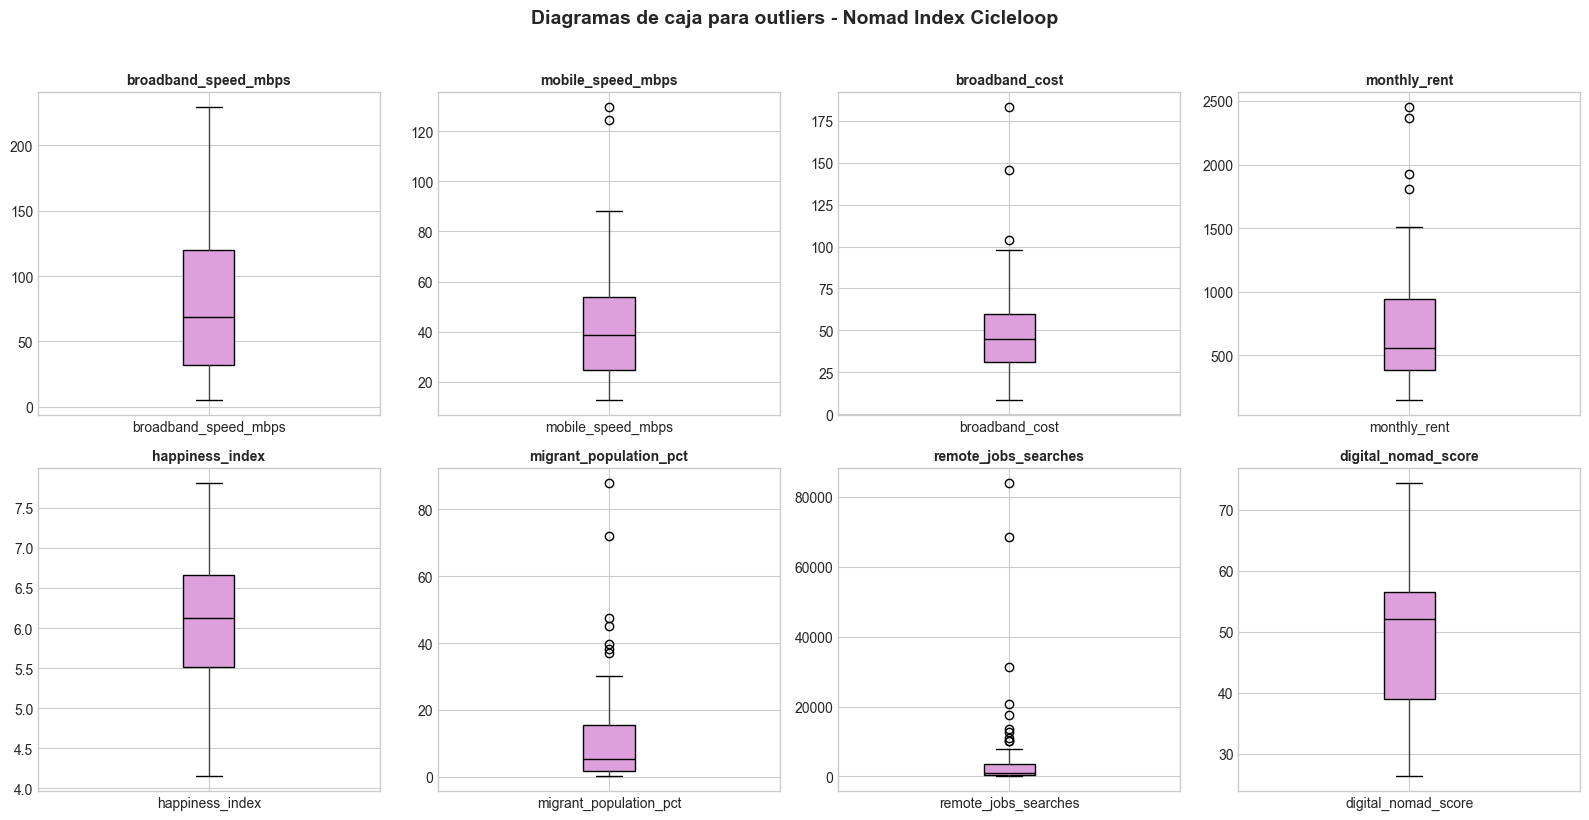

In [ ]:
# Creamos una lista de las variables principales del dataset de Nomad Index Circleloop

vars_list_circleloop = [
    'broadband_speed_mbps', 'mobile_speed_mbps', 'broadband_cost',
    'monthly_rent', 
    'happiness_index', 
    'migrant_population_pct',
    'remote_jobs_searches', 
    'digital_nomad_score'
    ]

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(vars_list_circleloop):
    ax = axes[i]
    df_circleloop[var].hist(bins=20, ax=ax, color='plum', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables numéricas - Nomad Index Circleloop)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(vars_list_circleloop):
    ax = axes[i]
    df_circleloop.boxplot(column=var, ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='plum', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(var, fontsize=10, fontweight='bold')

plt.suptitle('Diagramas de caja para outliers - Nomad Index Cicleloop', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Análisis de ranking de países en función de la variable `digital_nomad_score`

1. Top 10 países con mejor puntuación en destinos para nómadas digitales. 
2. Top 10 países con peor puntuación en destinos para nómadas digitales. 

In [ ]:
print("----------------------------------------------------------------------")
print("Top 10 países con mejor puntuación en destinos para nómadas digitales:")
print("----------------------------------------------------------------------")
print(df_circleloop.nlargest(10, 'digital_nomad_score')[['country', 'digital_nomad_score']])
print("----------------------------------------------------------------------")
print("Top 10 países con peor puntuación en destinos para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_circleloop.nsmallest(10, 'digital_nomad_score')[['country', 'digital_nomad_score']])

----------------------------------------------------------------------
Top 10 países con mejor puntuación en destinos para nómadas digitales:
----------------------------------------------------------------------
       country  digital_nomad_score
0       Canada                74.35
1           UK                63.43
2      Romania                62.28
3       Sweden                61.54
4      Denmark                61.49
5       France                60.80
6  Netherlands                60.27
7    Australia                60.16
8  Switzerland                60.15
9      Germany                60.00
----------------------------------------------------------------------
Top 10 países con peor puntuación en destinos para nómadas digitales:
---------------------------------------------------------------------
      country  digital_nomad_score
84    Nigeria                26.32
83    Myanmar                29.16
82      Ghana                30.36
81      Kenya                31.27
80  S

### **3.3 Análisis univariante: Nomad Index Movingto**

In [ ]:
# Estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables de Nomad Index Movingto:")
print("---------------------------------------------------------------------------")
df_movingto.describe().round(2)

Valores estadísticos descriptivos de las variables de Nomad Index Movingto:
---------------------------------------------------------------------------


,rank,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life
count,40.00,40.00,40.0,40.00,40.00,40.00,40.00
mean,20.50,72.50,83.8,73.97,84.25,85.05,87.30
std,11.69,11.69,6.6,13.64,8.33,7.09,6.66
min,1.00,53.00,70.0,50.00,65.00,70.00,75.00
25%,10.75,62.75,80.0,60.00,78.75,80.00,80.00
50%,20.50,72.50,85.0,75.50,85.00,85.00,87.00
75%,30.25,82.25,90.0,85.00,90.00,90.00,95.00
max,40.00,92.00,95.0,95.00,95.00,100.00,95.00


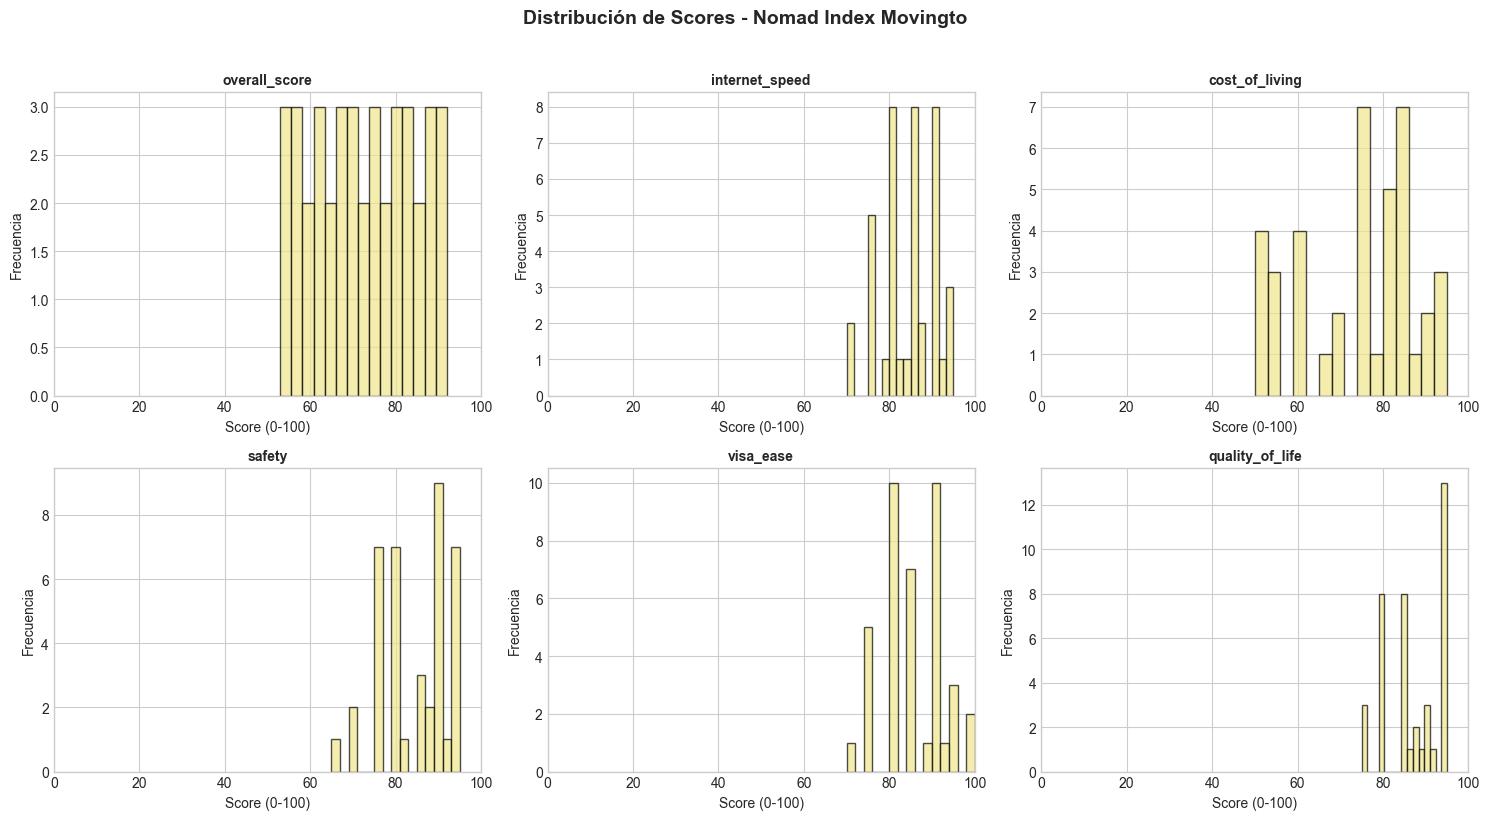

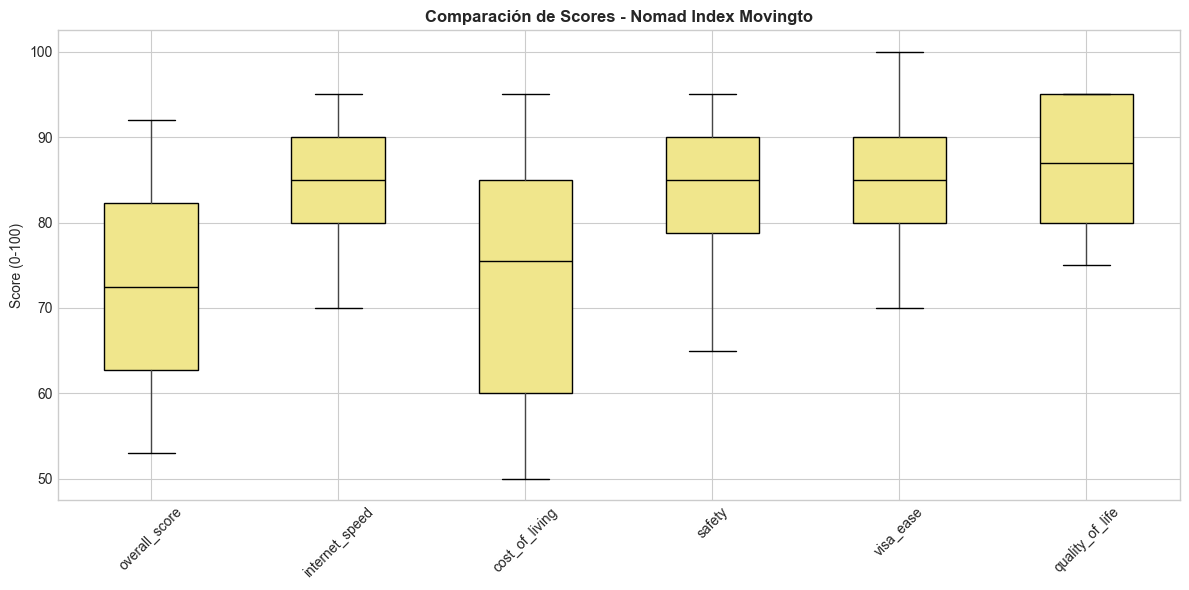

In [ ]:
# Creamos una lista de las variables principales del dataset de Nomad Index Movingto

vars_scores = ['overall_score', 
               'internet_speed', 
               'cost_of_living', 
               'safety', 
               'visa_ease', 
               'quality_of_life'
               ]

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(vars_scores):
    ax = axes[i]
    df_movingto[var].hist(bins=15, ax=ax, color='khaki', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('Score (0-100)')
    ax.set_ylabel('Frecuencia')
    ax.set_xlim(0, 100)

plt.suptitle('Distribución de Scores - Nomad Index Movingto', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, ax = plt.subplots(figsize=(12, 6))
df_movingto[vars_scores].boxplot(ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='khaki', color='black'),
                    medianprops=dict(color='black'))
ax.set_title('Comparación de Scores - Nomad Index Movingto', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (0-100)')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Análisis de ranking de países en función de las variables `internet_speed`, `safety` y `visa_ease`

1. Top 10 países con mejor puntuación en destinos para nómadas digitales de las tres variables. 
2. Top 10 países con peor puntuación en destinos para nómadas digitales de las tres variables. 

In [ ]:
print("---------------------------------------------------------------------")
print("Top 10 países con mejor velocidad de internet para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_movingto.nlargest(10, 'internet_speed')[['country', 'internet_speed']])
print("---------------------------------------------------------------------")
print("Top 10 países con peor velocidad de internet para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_movingto.nsmallest(10, 'internet_speed')[['country', 'internet_speed']])

---------------------------------------------------------------------
Top 10 países con mejor velocidad de internet para nómadas digitales:
---------------------------------------------------------------------
        country  internet_speed
1       Estonia              95
14    Singapore              95
25  South Korea              95
11  Netherlands              92
0      Portugal              90
10      Germany              90
24        Japan              90
26       Taiwan              90
36      Iceland              90
37       Norway              90
---------------------------------------------------------------------
Top 10 países con peor velocidad de internet para nómadas digitales:
---------------------------------------------------------------------
       country  internet_speed
22   Argentina              70
23    Colombia              70
12   Indonesia              75
19     Uruguay              75
20      Panama              75
28    Barbados              75
29  Monteneg

In [ ]:
print("--------------------------------------------------------")
print("Top 10 países con mejr seguridad para nómadas digitales:")
print("--------------------------------------------------------")
print(df_movingto.nlargest(10, 'safety')[['country', 'safety']])
print("--------------------------------------------------------")
print("Top 10 países con peor seguridad para nómadas digitales:")
print("--------------------------------------------------------")
print(df_movingto.nsmallest(10, 'safety')[['country', 'safety']])

--------------------------------------------------------
Top 10 países con mejr seguridad para nómadas digitales:
--------------------------------------------------------
        country  safety
0      Portugal      95
14    Singapore      95
24        Japan      95
35  New Zealand      95
36      Iceland      95
37       Norway      95
38      Finland      95
3         Spain      92
1       Estonia      90
10      Germany      90
--------------------------------------------------------
Top 10 países con peor seguridad para nómadas digitales:
--------------------------------------------------------
       country  safety
23    Colombia      65
22   Argentina      70
33      Serbia      70
5       Mexico      75
13     Vietnam      75
20      Panama      75
29  Montenegro      75
30     Hungary      75
31     Romania      75
32    Bulgaria      75


In [ ]:
print("-----------------------------------------------------------")
print("Top 10 mejores países por facilidad de visa para nómadas digitales:")
print("-----------------------------------------------------------")
print(df_movingto.nlargest(10, 'visa_ease')[['country', 'visa_ease']])
print("-----------------------------------------------------------")
print("Top 10 peores países por facilidad de visa para nómadas digitales:")
print("-----------------------------------------------------------")
print(df_movingto.nsmallest(10, 'visa_ease')[['country', 'visa_ease']])

-----------------------------------------------------------
Top 10 mejores países por facilidad de visa para nómadas digitales:
-----------------------------------------------------------
       country  visa_ease
2      Georgia        100
1      Estonia         98
0     Portugal         95
28    Barbados         95
5       Mexico         94
3        Spain         92
4     Thailand         90
7     Malaysia         90
9   Costa Rica         90
16       Malta         90
-----------------------------------------------------------
Top 10 peores países por facilidad de visa para nómadas digitales:
-----------------------------------------------------------
        country  visa_ease
24        Japan         70
14    Singapore         75
25  South Korea         75
26       Taiwan         75
34    Australia         75
35  New Zealand         75
11  Netherlands         80
13      Vietnam         80
15       Canada         80
30      Hungary         80


## **4. Análisis bivariante de todos los datasets y validación de hipótesis**

### **4.1 Mergeamos los datasets para análisis bivariante y analizar las hipótesis planteadas en el EDA**

**Las variables que tenemos disponibles:**

##### Cost of Living: variables agregadas del dataset
- `nomad_housing_cost`
- `basic_basket_index`
- `daily_meal_cost`
- `monthly_nomad_cost`
- `local_purchasing_power`
- `housing_salary_ratio`

##### Nomad Index Circleloop: variables clave del dataset
- `digital_nomad_score`
- `broadband_speed_mbps`
- `happiness_index`
- `monthly_rent`

##### Nomad Index Movingto: variables clave del dataset
- `overall_score`
- `safety`
- `visa_ease`
- `cost_of_living`

In [ ]:
# El objetivo es mergear todas las variables y los tres dataset en un único dataset
# Mergearlo nos ayuda a las comparativas posteriores de variables para la validación de hipótesis
# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país
# Para eso es necesario previamente que las columnas de país se llamen igual en todos los datasets

df_circleloop = df_circleloop.rename(columns={'country': 'country_name'}) 
df_movingto = df_movingto.rename(columns={'country': 'country_name'}) 
df_circleloop.head(5)

,rank,country_name,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49


In [ ]:
df_movingto.head(5)

,rank,country_name,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year


In [ ]:
# Creamos un diccionario con todos el listado de variables de cada uno de los datasets

df_vars_dict = {
    'df_cost': [
        'nomad_housing_cost', 'basic_basket_index', 'daily_meal_cost', 
        'monthly_nomad_cost', 'local_purchasing_power', 
        'housing_salary_ratio'
    ],
    'df_circleloop': [
        'digital_nomad_score', 
        'broadband_speed_mbps', 
        'mobile_speed_mbps',
        'broadband_cost',
        'happiness_index', 
        'monthly_rent'
    ],
    'df_movingto': [
        'overall_score', 'safety', 'visa_ease', 'cost_of_living'
    ]
}

df_cost_by_country = df_cost.groupby('country_name').agg({
    'continent': 'first',
    **{col: 'median' for col in df_vars_dict['df_cost']}
    }).reset_index()

# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país

df_circleloop_by_country = df_circleloop.groupby('country_name').agg({
    **{col: 'median' for col in df_vars_dict['df_circleloop']}
    }).reset_index()

# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país

df_movingto_by_country = df_movingto.groupby('country_name').agg({
    **{col: 'median' for col in df_vars_dict['df_movingto']}
    }).reset_index()


# Mergeamos primero el dataset de Cost of Living con Circleloop y lo instanciamos para tener ese dataset intermedio

df_cost_circleloop = df_cost_by_country.merge(df_circleloop_by_country, on='country_name', how='outer')
df_cost_circleloop.head(5)

,country_name,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio,digital_nomad_score,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,happiness_index,monthly_rent
0,Afghanistan,Asia,52.2625,0.761250,2.195,393.2975,0.515661,30.370149,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,155.0650,1.295833,5.550,369.5100,0.978007,43.021030,38.97,41.52,56.44,25.80,4.88,331.11
2,Algeria,Africa,113.3200,1.225417,2.220,271.4325,0.941333,43.519336,33.38,4.97,12.68,32.55,5.01,197.73
3,American Samoa,Oceania,441.6875,2.837083,24.820,1180.7200,2.874111,13.015615,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,714.9500,2.264167,14.960,1176.9900,2.132278,28.487809,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Y ahora mergeamos el dataset intermedio de Cost of Living + Circleloop con Movingto

df_master = df_cost_circleloop.merge(df_movingto_by_country, on='country_name', how='outer')
df_master.head(5)

,country_name,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio,digital_nomad_score,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,happiness_index,monthly_rent,overall_score,safety,visa_ease,cost_of_living
0,Afghanistan,Asia,52.2625,0.761250,2.195,393.2975,0.515661,30.370149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,155.0650,1.295833,5.550,369.5100,0.978007,43.021030,38.97,41.52,56.44,25.80,4.88,331.11,NaN,NaN,NaN,NaN
2,Algeria,Africa,113.3200,1.225417,2.220,271.4325,0.941333,43.519336,33.38,4.97,12.68,32.55,5.01,197.73,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,441.6875,2.837083,24.820,1180.7200,2.874111,13.015615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,714.9500,2.264167,14.960,1176.9900,2.132278,28.487809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **4.2 Matriz de correlación de todas las variables entre sí con mapa de calor**

Matriz de correlación: 16 x 16


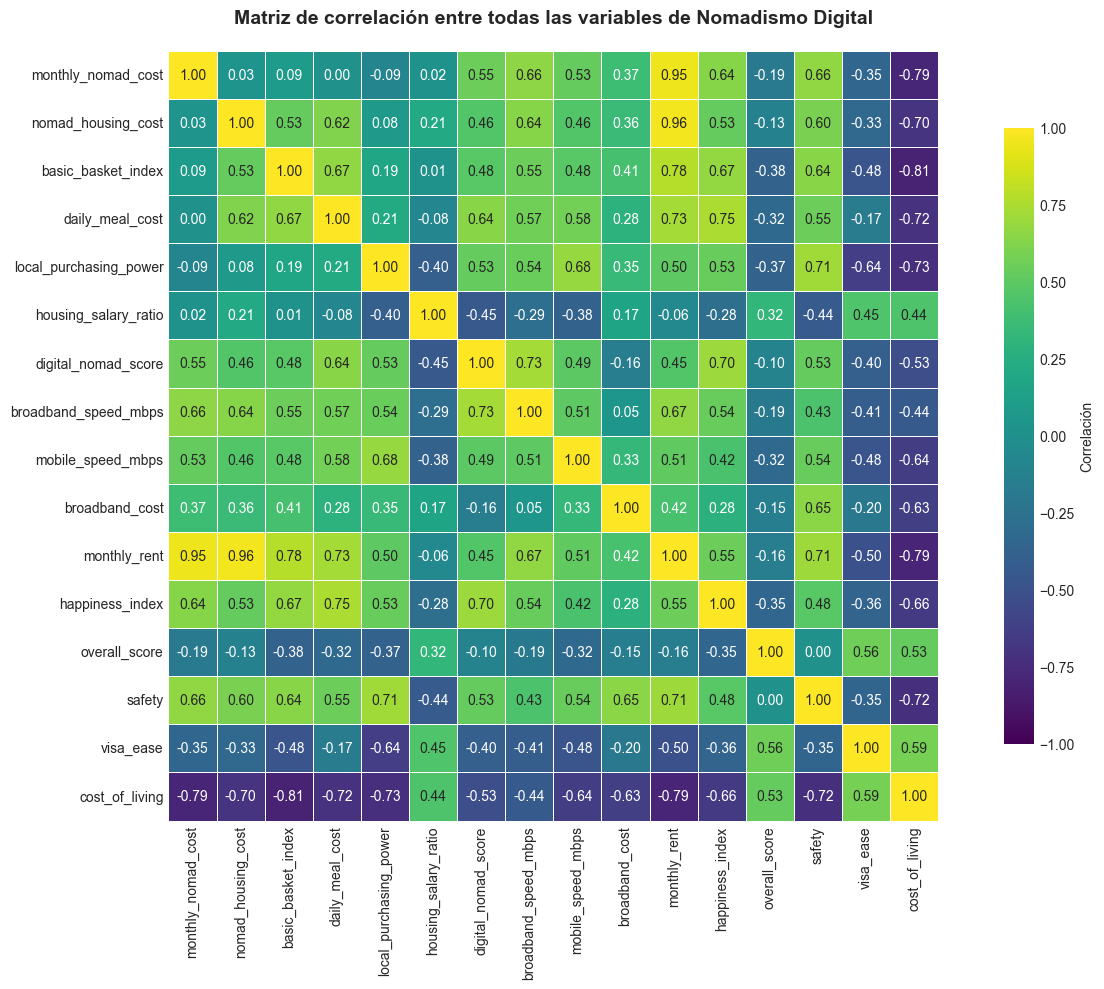

In [ ]:
# Definimos un listado con todas las variables del dataset master

master_vars_list = [
    # Indices de Feature Engineering (Cost of Living)
    'monthly_nomad_cost',
    'nomad_housing_cost', 
    'basic_basket_index',
    'daily_meal_cost',
    'local_purchasing_power',
    'housing_salary_ratio',
    # Variables Circleloop
    'digital_nomad_score',
    'broadband_speed_mbps',
    'mobile_speed_mbps',
    'broadband_cost',
    'monthly_rent',
    'happiness_index',
    # Variables Movingto
    'overall_score',
    'safety',
    'visa_ease',
    'cost_of_living'
]

# Calcular la matriz en función del Coeficiente de Correlación de Pearson

df_heatmap = df_master[master_vars_list].corr(method='pearson')

print(f"Matriz de correlación: {df_heatmap.shape[0]} x {df_heatmap.shape[1]}")

# Heatmap de correlaciones bivariante entre las distintas variables

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(
    df_heatmap,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'},
    ax=ax
)

ax.set_title('Matriz de correlación entre todas las variables de Nomadismo Digital', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Top correlaciones con digital_nomad_score

vars_vs_nomad_score = df_heatmap['digital_nomad_score'].drop('digital_nomad_score').sort_values(key=abs, ascending=False)

print("¿Cuáles son las variables de cada detino que mejor puntúan para los nómadas digitales?:")
print("---------------------------------------------------------------------------------------")
for var, correlation in vars_vs_nomad_score.items():
    positive_correlation = "+" if correlation > 0 else ""
    trend = "correlación fuerte" if abs(correlation) > 0.5 else "correlación moderada" if abs(correlation) > 0.3 else "correlación débil"
    print(f"  {var:<25} {positive_correlation}{correlation:.2f} ({trend})")
print("----------------------------------------------------------------------------------------")
print("La velocidad de internet es la que tiene un mayor grado de correlación a priori")
print("Después vienen índice de bienestar, coste de comidas fuera de casa y gasto mensual")
print("----------------------------------------------------------------------------------------")

¿Cuáles son las variables de cada detino que mejor puntúan para los nómadas digitales?:
---------------------------------------------------------------------------------------
  broadband_speed_mbps      +0.73 (correlación fuerte)
  happiness_index           +0.70 (correlación fuerte)
  daily_meal_cost           +0.64 (correlación fuerte)
  monthly_nomad_cost        +0.55 (correlación fuerte)
  cost_of_living            -0.53 (correlación fuerte)
  safety                    +0.53 (correlación fuerte)
  local_purchasing_power    +0.53 (correlación fuerte)
  mobile_speed_mbps         +0.49 (correlación moderada)
  basic_basket_index        +0.48 (correlación moderada)
  nomad_housing_cost        +0.46 (correlación moderada)
  monthly_rent              +0.45 (correlación moderada)
  housing_salary_ratio      -0.45 (correlación moderada)
  visa_ease                 -0.40 (correlación moderada)
  broadband_cost            -0.16 (correlación débil)
  overall_score             -0.10 (correlac

### **4.3 Hipótesis primarias a validar**

- **Hipótesis 1**: coste de vida medio --> ¿los mejores destinos siempre son los que menos coste mensual exigen?
- **Hipótesis 2**: salarios vs coste --> ¿la relación entre los salarios y el coste es clave para ser un buen destino?
- **Hipótesis 3**: conectividad para trabajar --> ¿cuanto más velocidad de conexión a menos precio, mejor destino nómada digital

- Usamos visualizaciones de Diagramas de dispersión para comprar varibles con el índice de puntuación de nómadas digitales a países. 
- Las líneas de tendencia ascendentes muestran correlaciones positivas. 
- Las líneas de tendencia descendentes muestran correlaciones negativas. 

**Correlaciones positivas:** 

1. Gastos mensuales y poder adquisitivo. Menos gastos y más poder adquisitivo correlan con mejor nota. 
2. Más velocidad de internet en general y en móvil correlan positivamente con mejor nota en el índice. 

**Correlaciones negativas:**

1. El coste del servicio a internet, en cambio, no correla. No es un elemento relevante en el índice de nomadismo digital. 

### **Validación de hipótesis 1 y 2: cómo afecta el coste de vida mensual y el poder adquisitivo en la puntuación de los países como destino**

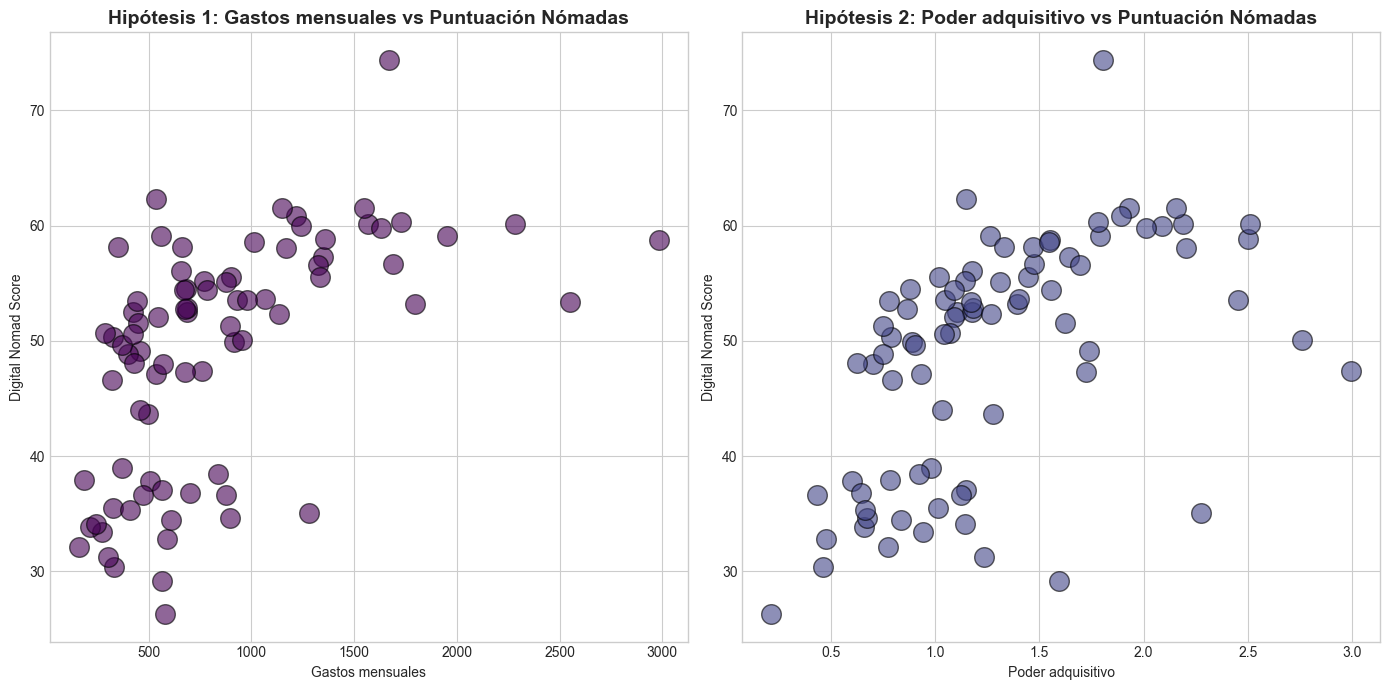

In [ ]:
# Scatter plots: usamos esta visualización para hacer análisis bivariante y confirmar correlaciones: 
# 1. Coste de vida promedio vs Puntuación de Nómadas digitales a destinos concretos
# 2. Poder adquisitivo vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: gastos mensuales contra puntuación de destinos por nómadas digitales

axes[0].scatter(
    df_cost_circleloop['monthly_nomad_cost'],
    df_cost_circleloop['digital_nomad_score'],
    c='#440154',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[0].set_xlabel('Gastos mensuales')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 1: Gastos mensuales vs puntuación nómadas', fontsize=14, fontweight='bold')

# Scatter plot 2: poder adquisitivo contra puntuación de destinos por nómadas digitales

axes[1].scatter(
    df_cost_circleloop['local_purchasing_power'],
    df_cost_circleloop['digital_nomad_score'],
    c='#414487',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[1].set_xlabel('Poder adquisitivo')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 2: Poder adquisitivo vs puntuación nómadas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

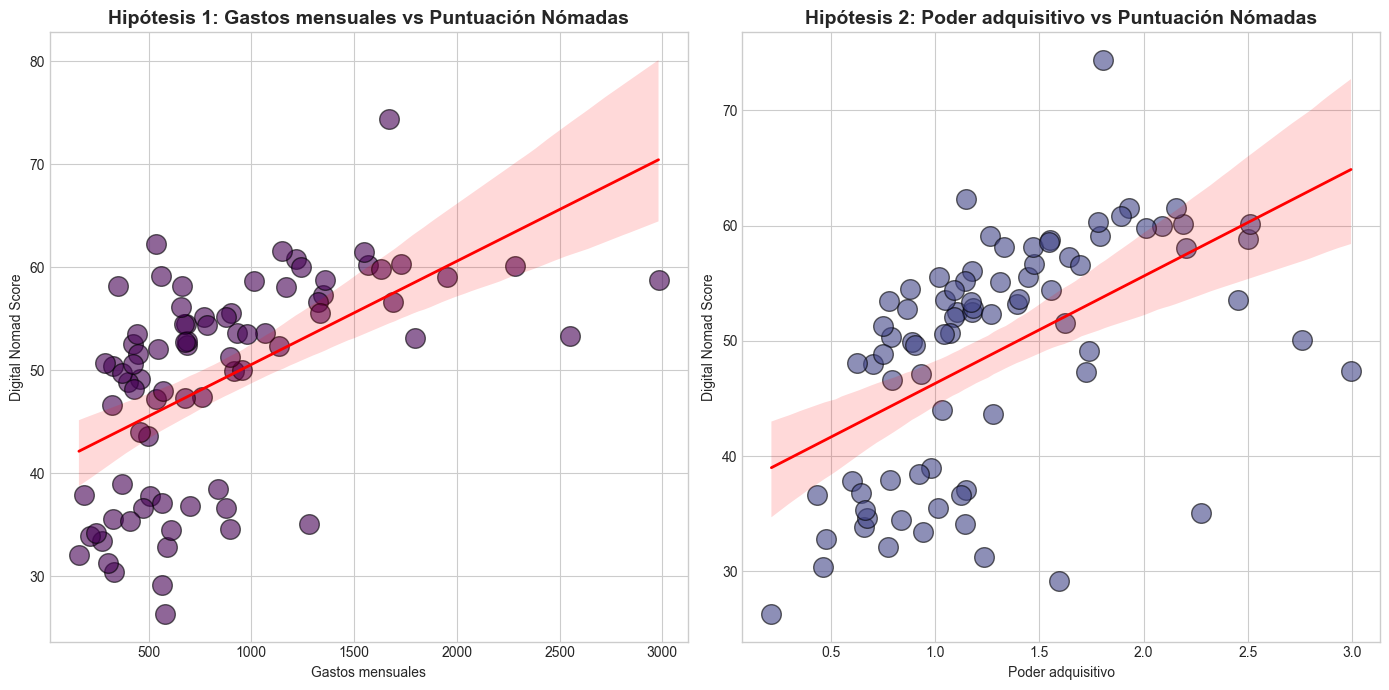

In [ ]:
# Mismos scatters plot pero con líneas de tendencia para ver la correlación: 
# 1. Coste de vida promedio vs Puntuación de Nómadas digitales a destinos concretos
# 2. Poder adquisitivo vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Regplot 1: gastos mensuales contra puntuación de destinos por nómadas digitales + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='monthly_nomad_cost',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': '#440154',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Gastos mensuales')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 1: Gastos mensuales vs puntuación nómadas', fontsize=14, fontweight='bold')

# Regplot 2: poder adquisitivo contra puntuación de destinos por nómadas digitales

sns.regplot(
    data=df_cost_circleloop,
    x='local_purchasing_power',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': '#414487',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Poder adquisitivo')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 2: Poder adquisitivo vs puntuación nómadas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### **Validación de hipótesis 3: cómo la velocidad de conexión a internet general y móvil o el coste afectan a la valoración de destino**


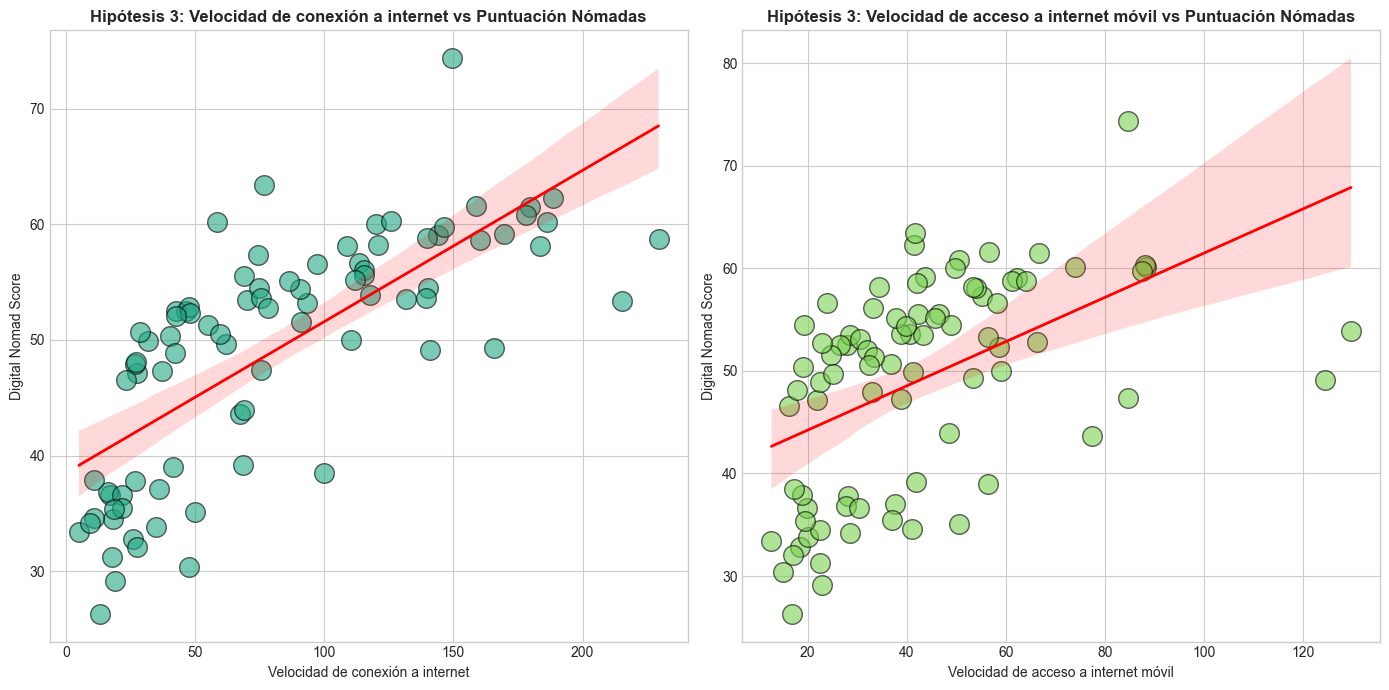

In [ ]:
# 1. Velocidad de conexión a internet vs Puntuación de Nómadas digitales a destinos concretos
# 2. Velocidad de acceso a internet móvil vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Regplot 1: velocidad de conexión a internet vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='broadband_speed_mbps',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': '#22A884',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Velocidad de conexión a internet')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 3: Velocidad de conexión a internet vs puntuación nómadas', fontsize=12, fontweight='bold')

# Regplot 2: velocidad de acceso a internet móvil vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='mobile_speed_mbps',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': '#7AD151',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Velocidad de acceso a internet móvil')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 3: Velocidad de acceso a internet móvil vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


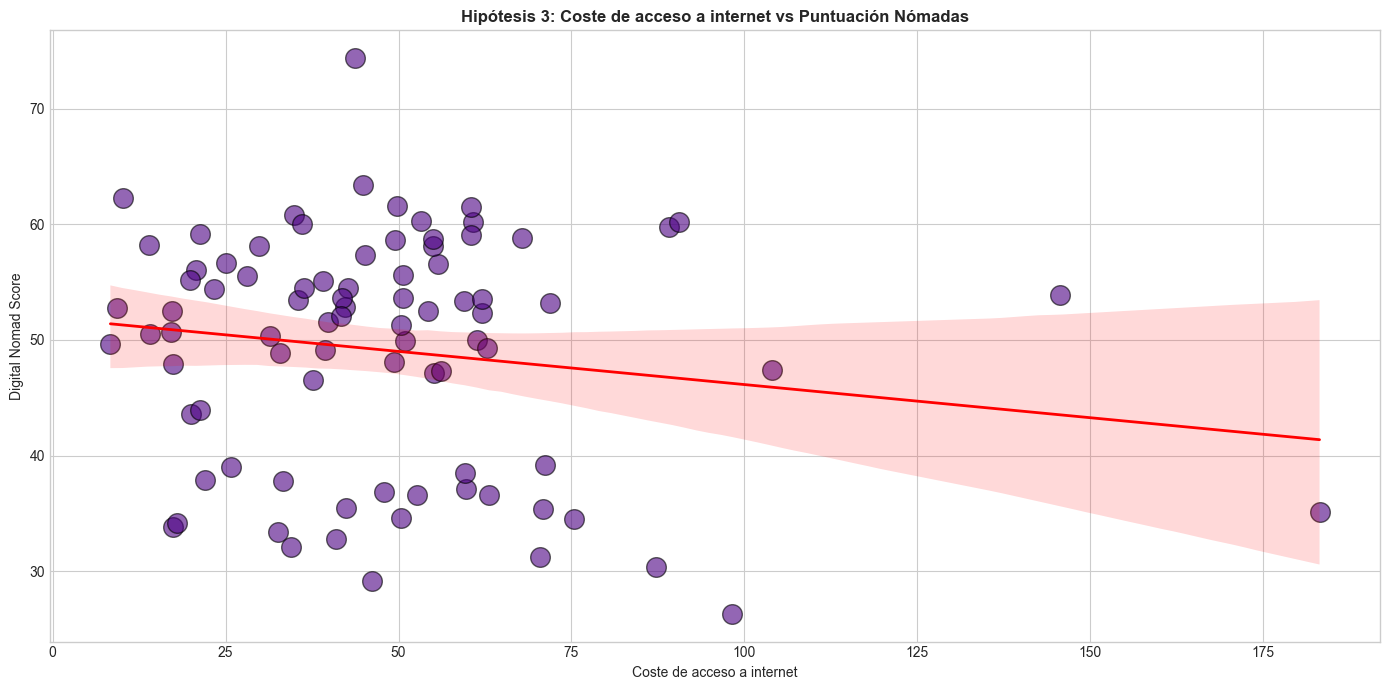

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

# Regplot: Coste de internet vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='broadband_cost',
    y='digital_nomad_score',
    ax=axes,
    scatter_kws={
        'color': 'indigo',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Coste de acceso a internet')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis 3: Coste de acceso a internet vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **4. Hipótesis secundarias**

### **4.1. Valiación de hipótesis 4: la variable vivienda --> ¿el alquiler de vivienda es una razón determinante por encima de alimentación?**

**Correlaciones muy positivas**: el gasto de salir a comer fuera de casa --> pesa el gasto en coworkings o reuniones de trabajo. 

**Correlaciones positivas pero menos**: alquiler mensual y cesta de la compra. 

**Correlaciones negativas**: porcentaje de gasto de salario en pago de vivienda (alquiler)

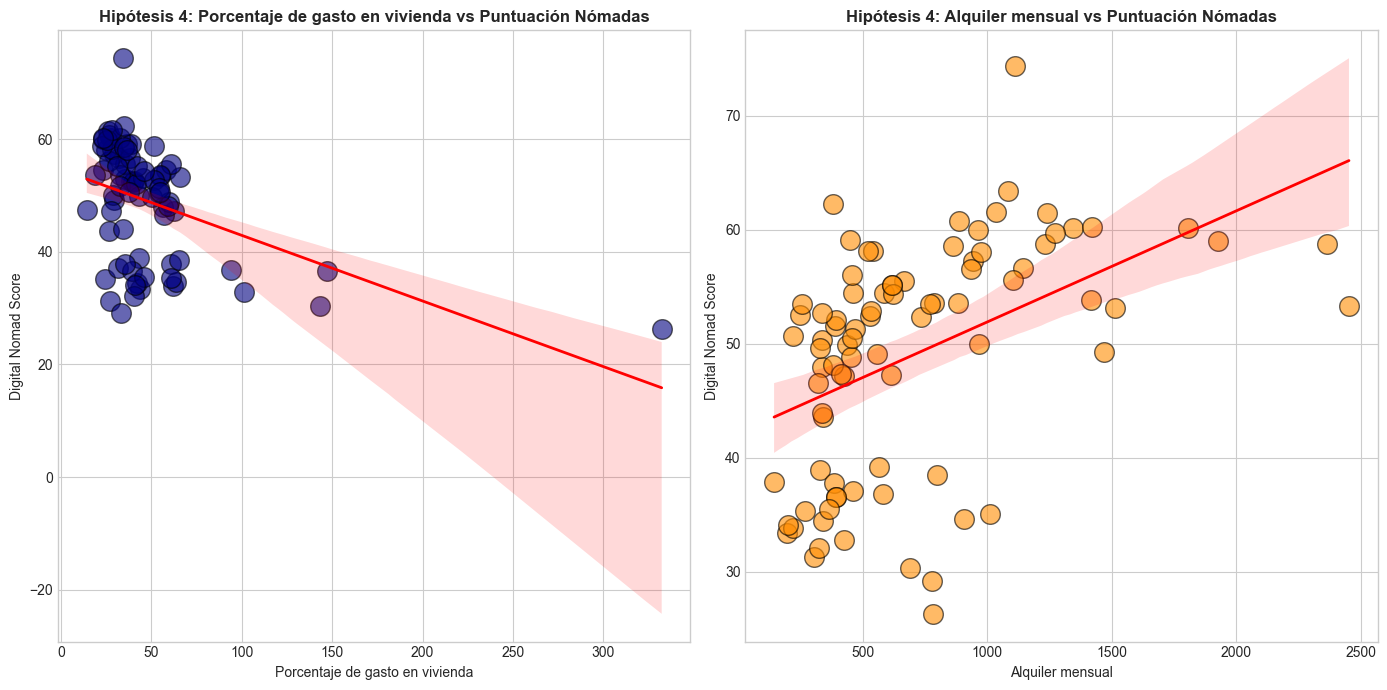

In [ ]:
# 1. Porcentaje de gasto en vivienda vs Puntuación de Nómadas digitales a destinos concretos
# 2. Alquiler mensual vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Regplot 1: Porcentaje de gasto en vivienda vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='housing_salary_ratio',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': 'navy',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Porcentaje de gasto en vivienda')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 4: Porcentaje de gasto en vivienda vs puntuación nómadas', fontsize=12, fontweight='bold')

# Regplot 2: Alquiler mensual vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

sns.regplot(
    data=df_cost_circleloop,
    x='monthly_rent',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color':'darkorange',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Alquiler mensual')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 4: Alquiler mensual vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.2 **Validación hipótesis 5: ¿hay países que ofrecen mejores condiciones generales por menos coste mensual?**

- Existe correlación positiva pero no es especialmente fuerte. 

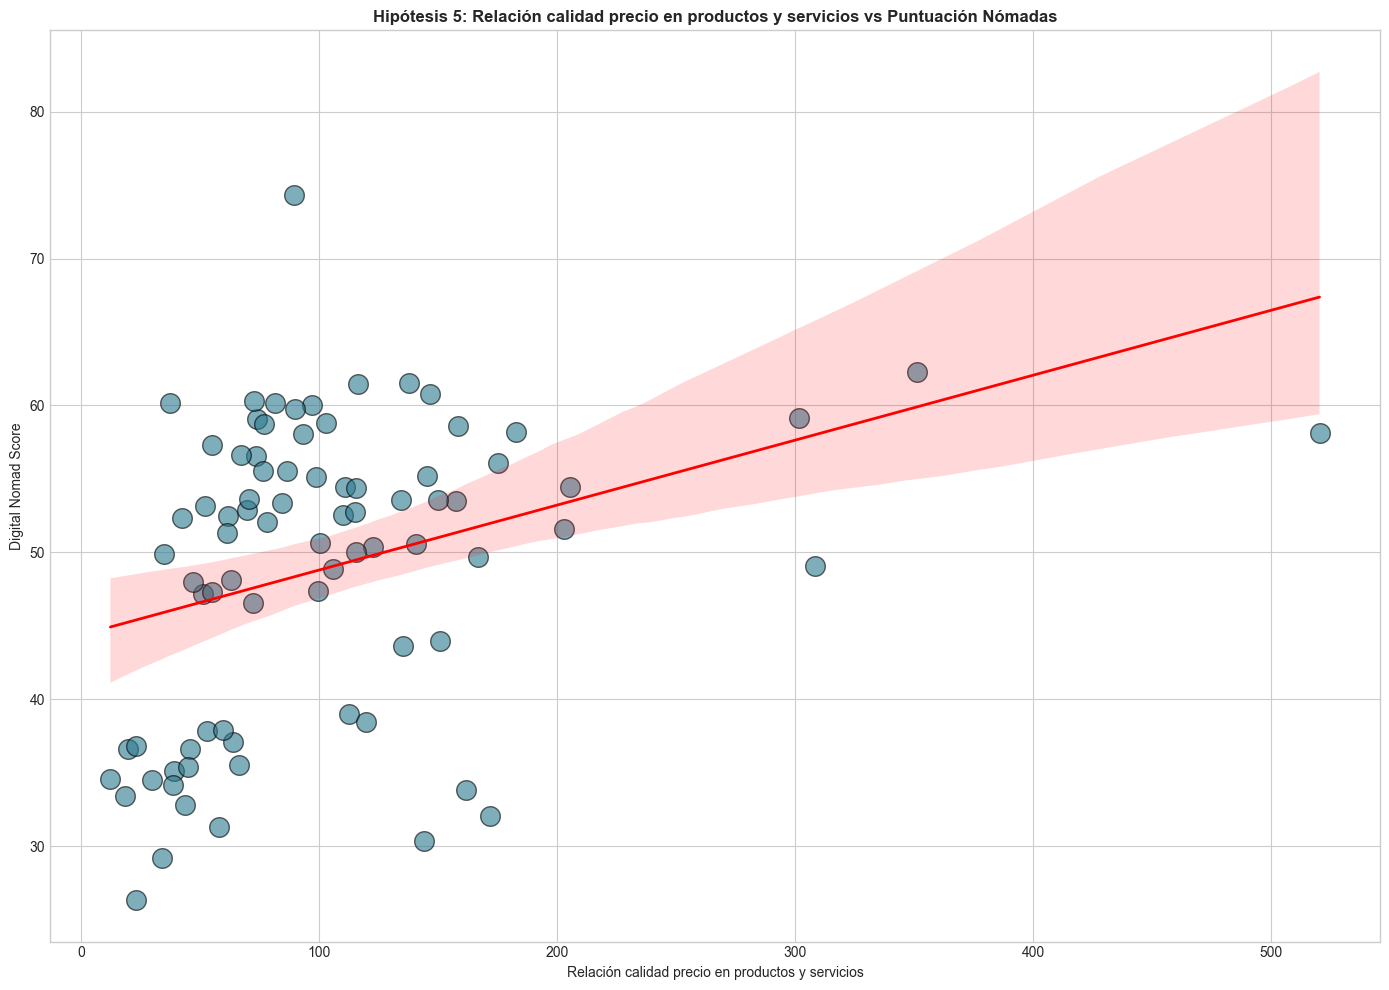

In [ ]:
# Relación calidad precio en productos y servicios vs Puntuación de Nómadas digitales a destinos concretos

# Incluimos una nueva variable agregada que calcula coste prioritario (internet) vs coste mensual promedio. 

df_cost_circleloop['value_for_money'] = (
    df_cost_circleloop['broadband_speed_mbps'] / 
    df_cost_circleloop['monthly_nomad_cost'] * 1000
    )

# Regplot: Relación calidad precio en productos y serviciosa vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

fig, axes = plt.subplots(1, 1, figsize=(14, 10))

sns.regplot(
    data=df_cost_circleloop,
    x='value_for_money',
    y='digital_nomad_score',
    ax=axes,
    scatter_kws={
        'color': '#2A788E',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Relación calidad precio en productos y servicios')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis 5: Relación calidad precio en productos y servicios vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3. **Validación de la hipótesis 6: bienestar social --> ¿los países con buen índice de felicidad atraen más nómadas digitales?**

- Es posiblemente la variable que mayor correlación positiva experimenta junto a la velocidad de conexión a internet. 
- Elemento determinante para la puntuación que dan los nómadas digitales a los destinos de los ránkings. 

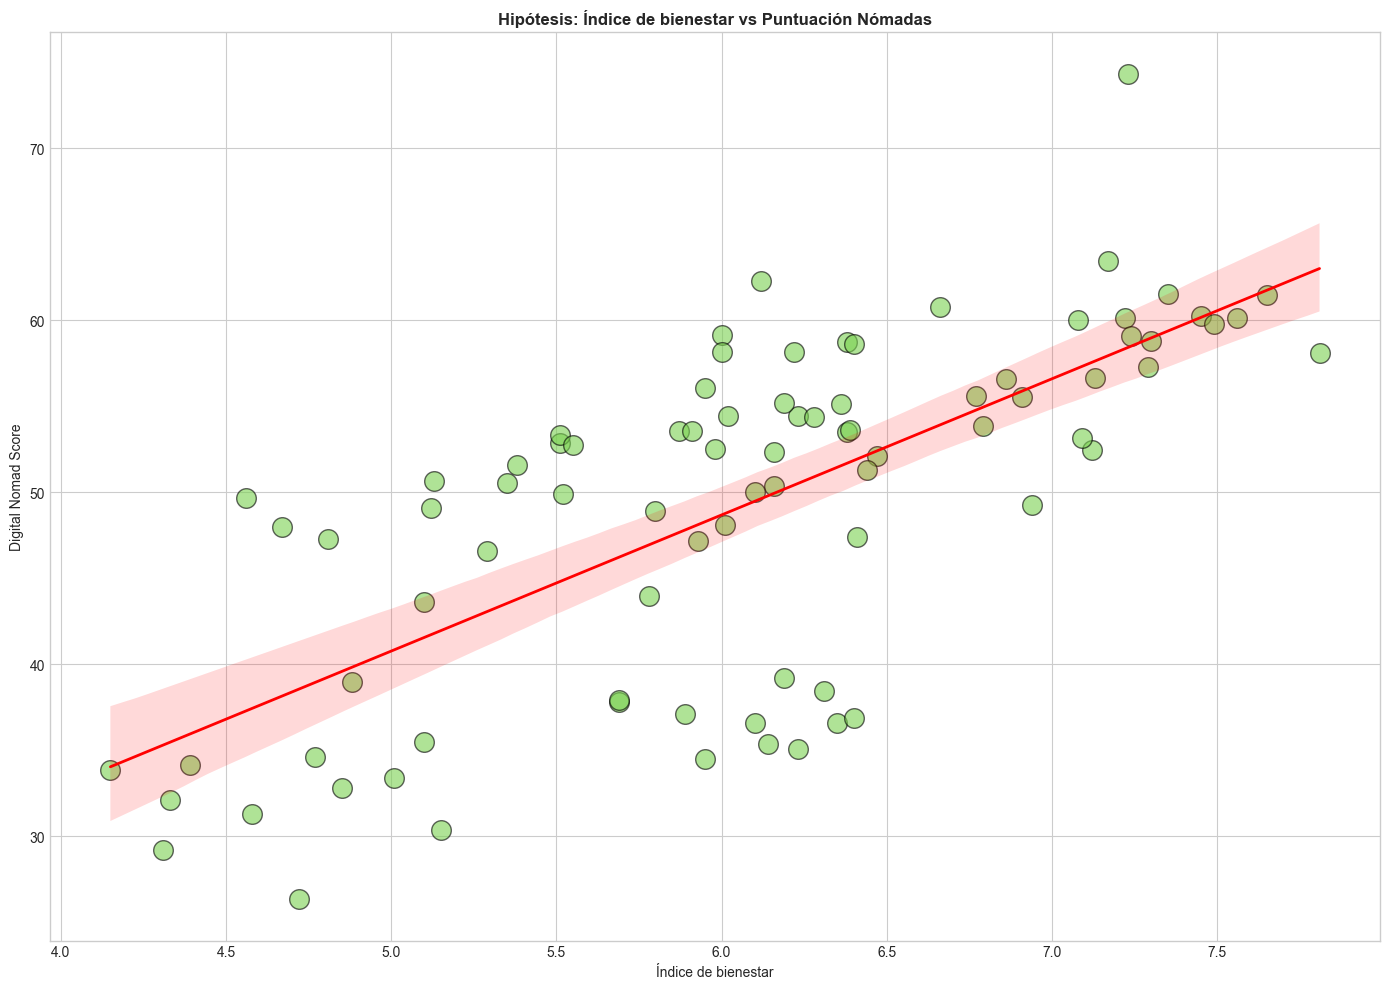

In [ ]:
# Índice de bienestar vs Puntuación de Nómadas digitales a destinos concreto

# Regplot: Índice de bienestar vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

fig, axes = plt.subplots(1, 1, figsize=(14, 10))

sns.regplot(
    data=df_cost_circleloop,
    x='happiness_index',
    y='digital_nomad_score',
    ax=axes,
    scatter_kws={
        'color': '#7AD151',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Índice de bienestar')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis: Índice de bienestar vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **4.4. Validación de la hipótesis 7: países con bajo coste y alta puntuación por continente**

In [ ]:
# Identificar outliers estratégicos: bajo coste + alto score

median_cost = df_cost_circleloop['monthly_nomad_cost'].median()
median_score = df_cost_circleloop['digital_nomad_score'].median()

top_countries = df_cost_circleloop[(df_cost_circleloop['monthly_nomad_cost'] < median_cost) & 
                                   (df_cost_circleloop['digital_nomad_score'] > median_score)][['country_name', 'continent', 'monthly_nomad_cost', 'digital_nomad_score']].sort_values('digital_nomad_score', ascending=False)

print("Países con menos coste mensual y mejor score en ránking para nómadas digitales")
print("------------------------------------------------------------------------------")
print(top_countries)
print("------------------------------------------------------------------------------")
print("El países que mejor equilibra gasto y puntuación en el mundo es Rumanía")
print("En el TOP2 está otro páises europeo: Hungría")
print("El TOP3 de países con menor gasto y mejor puntuación es Lituania")
print("""El resto del ránking por orden serían:
4. Tailandia
5. Chile en Sudamérica
6. Estonia de nuevo en Europa
7. Brasil en Sudamérica
8. Croacia en Europa
9. Rusia en Europa
10. Último país del TOP10: Argentina en Sudamérica""")

Países con menos coste mensual y mejor score en ránking para nómadas digitales
------------------------------------------------------------------------------
    country_name      continent  monthly_nomad_cost  digital_nomad_score
156      Romania         Europe           536.80000                62.28
84       Hungary         Europe           562.21750                59.12
111    Lithuania         Europe           661.18750                58.17
191     Thailand           Asia           352.85500                58.13
105       Latvia         Europe           657.97500                56.08
38         Chile  South America           682.34000                54.46
59       Estonia         Europe           673.18625                54.45
27        Brazil  South America           445.74500                53.49
45       Croatia         Europe           684.62625                52.86
157       Russia         Europe           678.43500                52.72
8      Argentina  South America        

### **4.5. Validación de hipótesis 8: seguridad --> ¿la seguridad es un elemento decisivo en la elección?**

- Variable totalmente irrelevante a la hora de escoger destino para los nómadas digitales. Coeficiente de correlación tendente a 0.

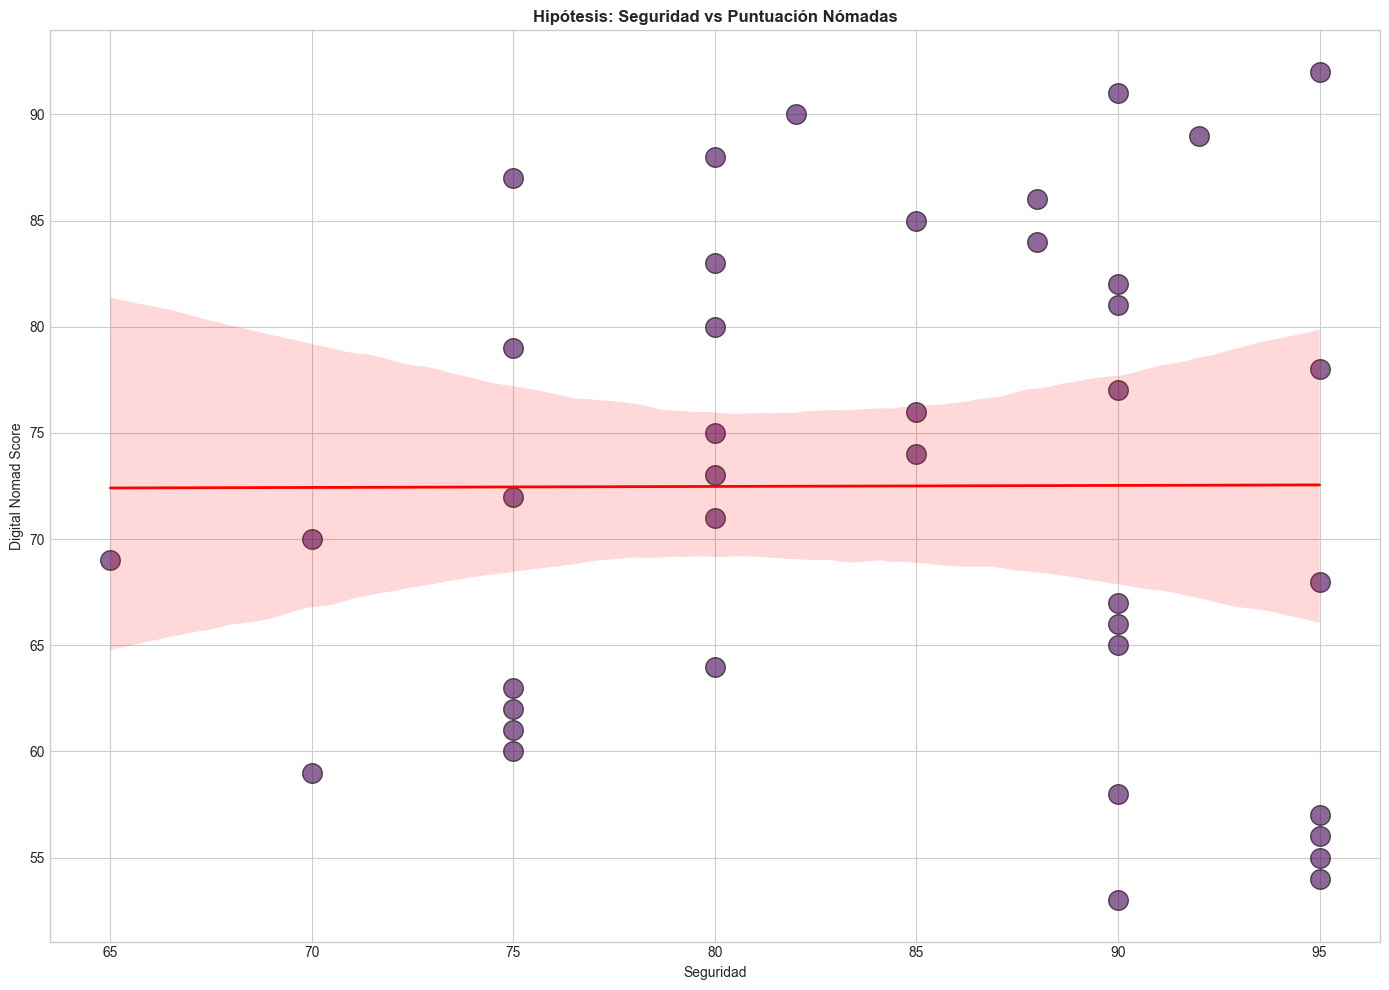

In [ ]:
# Regplot: Seguridad vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

fig, axes = plt.subplots(1, 1, figsize=(14, 10))

sns.regplot(
    data=df_movingto,
    x='safety',
    y='overall_score',
    ax=axes,
    scatter_kws={
        'color': '#440154',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Seguridad')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis: Seguridad vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **4.5. Validación de hipótesis 9: facilidad de visado --> ¿la accesibilidad legal es una variable que afecta al ránking de destinos?**

- Correlación positiva en el caso de facilidad para conseguir el visado. 

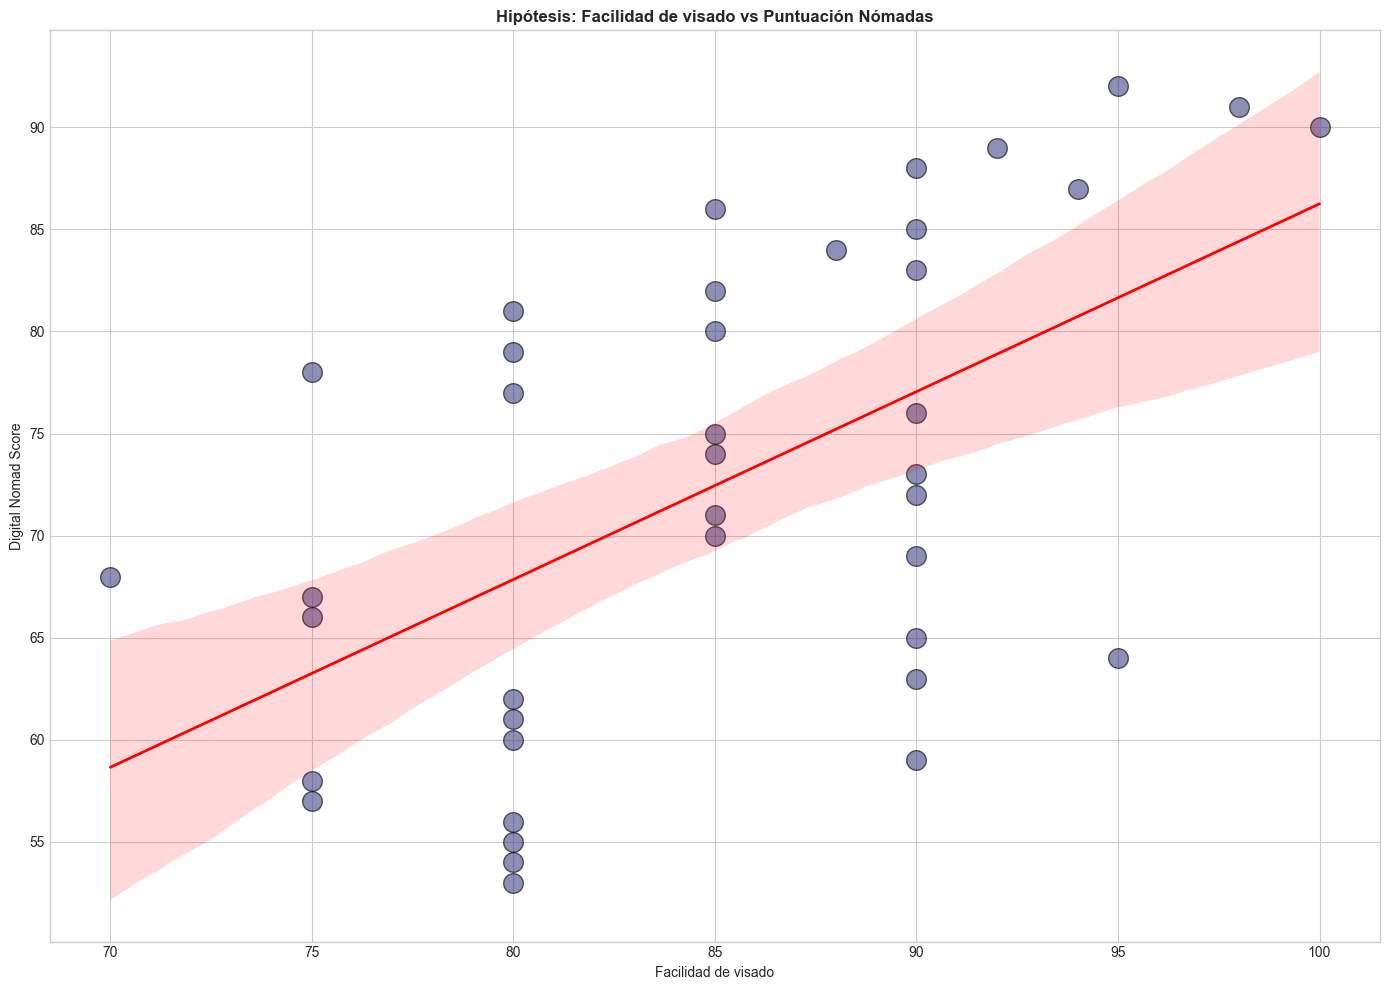

In [ ]:
# Regplot: Obtención de visado vs puntuación de Nómadas digitales a destinos concretos + regresión lineal

fig, axes = plt.subplots(1, 1, figsize=(14, 10))

sns.regplot(
    data=df_movingto,
    x='visa_ease',
    y='overall_score',
    ax=axes,
    scatter_kws={
        'color': '#414487',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Facilidad de visado')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis: Facilidad de visado vs puntuación nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## **5. Conclusiones en la validación de hipótesis**

### **Resumen de correlaciones y confirmaciones de hipótesis planteadas en el EDA**

❌ **Hipótesis 1**: Existe una relación positiva entre coste y ránking, por lo que un menor gasto mensual no lleva a elegir destino

---

✅ **Hipótesis 2**: A mayor poder adquisitivo mejora la nota dada al país por parte de los nómadas

---

✅ **Hipótesis 3**: A mayor velocidad de acceso a internet, mejor el puesto en el ránking nómada

---

❌ **Hipótesis 4**: El coste en vivienda no es relevante. Comer fuera o el gasto en la cesta prevalecen

---

✅ **Hipótesis 5**: Mejor relación calidad precio de productos y servicios correla positivamente

---

✅ **Hipótesis 6**: Sí, los nómadas digitales se fijan en el índice de felicidad de los países

---

✅ **Hipótesis 7**: El TOP3 de países con menos coste y mejor puntuación son: Rumanía, Hungría y Lituania, tres en Europa

---

❌ **Hipótesis 8**: La seguridad en el país de destino no es un elemento clave para el ránking

---

✅ **Hipótesis 9**: La facilidad para conseguir la visa, en cambio, sí lo es